## Travel Package Purchase Description 

The company **Visit With Us** sells a number of different travel packages and currently has an 18% conversion rate. Visit With Us has observed its marketing costs are very high because potential customers are picked not using any targeting data. The company is introducting a new travel package **Wllness Tourism** and would like to predict which customers to target with marketing based up customer information. 

#### Definitions 
(copied from the problem statement)

**Customer Info**
- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

**Customer Interaction Info:**
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# install the ability to read Excel Documents
# pip install xlrd

Read Sheet 1 of the Excel file into a list, we will then drop uncessary rows and columns.

In [3]:
dictionary = pd.read_excel('Tourism.xlsx', sheet_name=0)

In [4]:
dictionary.shape

(21, 4)

In [5]:
dictionary.head(4)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,Tourism,CustomerID,Unique customer ID
2,NaN,Tourism,ProdTaken,Whether the customer has purchased a package o...
3,NaN,Tourism,Age,Age of customer


In [6]:
dictionary = dictionary.drop(['Unnamed: 0','Unnamed: 1'], axis=1)
dictionary = dictionary.drop(0, axis=0)

In [7]:
dic = pd.DataFrame(dictionary)
dic.columns = ['Variable','Description']

### Data Dictionary

In [8]:
dic.head(20)

,Variable,Description
1,CustomerID,Unique customer ID
2,ProdTaken,Whether the customer has purchased a package o...
3,Age,Age of customer
4,TypeofContact,How customer was contacted (Company Invited or...
5,CityTier,City tier depends on the development of a city...
6,DurationOfPitch,Duration of the pitch by a salesperson to the ...
7,Occupation,Occupation of customer
8,Gender,Gender of customer
9,NumberOfPersonVisiting,Total number of persons planning to take the t...
10,NumberOfFollowups,Total number of follow-ups has been done by sa...


Read Sheet 2 into a data frame 

In [9]:
# Read the Excel document into a new data frame
travel = pd.read_excel('Tourism.xlsx', sheet_name=1)

In [10]:
data = travel.copy()

In [11]:
data.shape

(4888, 20)

In [12]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
data = data.drop(columns='CustomerID')
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Customer ID is the same as the index with a preceeding 2 and number of 0s. We can use the index to correlate back to customerID later if needed, droping this column

In [14]:
# Lets take a look at the type of data we are dealing with 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


- the mean Age is 37.6 but the 25% quartiles is 31 & the 75% quartile is 44, this means that 50% of our customers are between 31 - 44. 
- The average pitch was only 15 minutes, it will be intersting to compare duration of pitch to ProdTaken
- on Duration of Pitch 75% of visits are under 20 minutes but the max is 127, we may have an outlier we need to treat here
- 75% of number of trips is 4 or below but the max value is 22, there maybe an outlier here
- The mean Monthly Income is 23,619.85, the 25th quartile starts at 20,346 and the 75th quartile is 25,571. This means that more than 50% of customers make between 20,346 & 25,571
- Monthly income has a 75% quartile of 25,571 but a max value of 98678, we will most likely need to deal with some outliers in this row

In [16]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

We can see we have a large number of missing values in several areas. In this data frame all floats have missing values. Later on we will replace these values with the medium value for each column. 

In [17]:
data.nunique().sort_values(ascending=False)

MonthlyIncome               2475
Age                           44
DurationOfPitch               34
NumberOfTrips                 12
NumberOfFollowups              6
Designation                    5
PitchSatisfactionScore         5
ProductPitched                 5
NumberOfPersonVisiting         5
MaritalStatus                  4
Occupation                     4
NumberOfChildrenVisiting       4
Gender                         3
PreferredPropertyStar          3
CityTier                       3
Passport                       2
OwnCar                         2
TypeofContact                  2
ProdTaken                      2
dtype: int64

Lets take a look at the type of data in each column

In [18]:
cols = data.columns
cols = cols.drop(['MonthlyIncome','Age','DurationOfPitch','NumberOfTrips'])   
# There are a large number of unique items in a few columns that I dont want to print simply because of too much data that might not be that interesting or will be better vizulized in a graph

In [19]:
for feature in cols:
    print(feature, "has these unique values")
    print(data[feature].value_counts().sort_values(ascending=False))
    print('')
    print('---------------------------------------------')
    print('')

ProdTaken has these unique values
0    3968
1     920
Name: ProdTaken, dtype: int64

---------------------------------------------

TypeofContact has these unique values
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

---------------------------------------------

CityTier has these unique values
1    3190
3    1500
2     198
Name: CityTier, dtype: int64

---------------------------------------------

Occupation has these unique values
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

---------------------------------------------

Gender has these unique values
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

---------------------------------------------

NumberOfPersonVisiting has these unique values
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

---------------------------------------------

NumberOfFoll

# Follow Ups Here
**In Bivariate analysis we should look at these, from the published rubric:**
- TypeOfContact vs ProdTaken
- The vast majority Follow ups were 3-4 we should compare these to ProdTaken
- We need to compare ProductPitched to a number of factors such as 
        Age
        Type of Contact
        PitchSatisfactionScore
        Designation
        Monthly Income

**Interesting observations**
- Almost no trips are to tier 2 cities
- The majorit of Enquiries were self initiated, I do wonder how these will look when compared to ProdTaken and if the % of self initiated will be higher than the % of company invited
- Very few people taking these trips are free lancers
- Very few trips were take to visit 1 or 5 people, most trips are taken to visit 2-4 people


**Need to Fix**
In Gender there is type 'Fe Male' that will need to be corrected, these most likely should be 'Female' and we just need to remove the space


### Univariate & Bivariate Analysis

In [20]:
def histBox(df, feature):
    "Print a combined histogram & boxplot"
    
    showMe, (box, hist) = plt.subplots(
        nrows=2, 
        sharex=True, 
        gridspec_kw={'height_ratios': (0.25, 0.75)}, 
        figsize=(15,10)
    )
    
    sns.boxplot(data=df, x=feature, ax=box, showmeans=True, color='violet')
    sns.histplot(data=df, x=feature, ax=hist, kde=False, palette='winter')

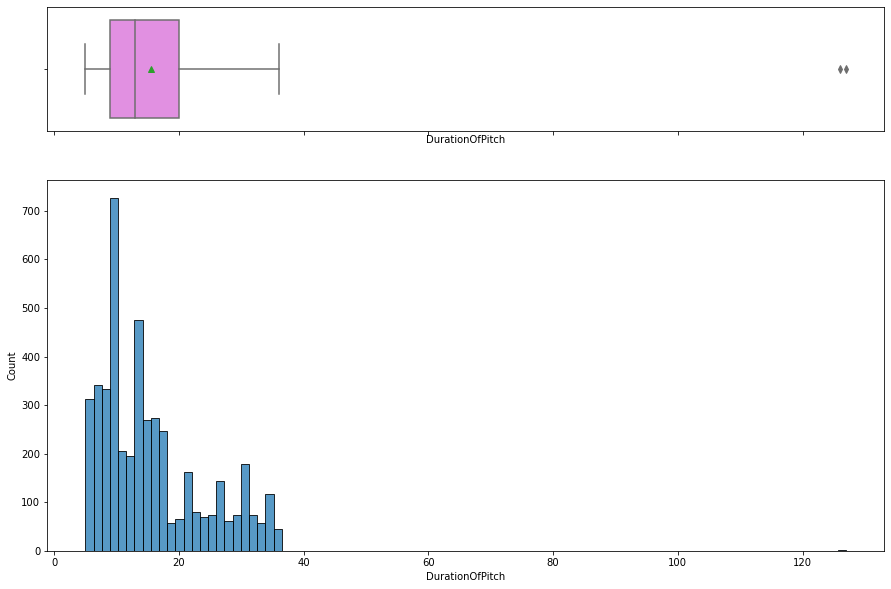

In [21]:
histBox(data, 'DurationOfPitch')

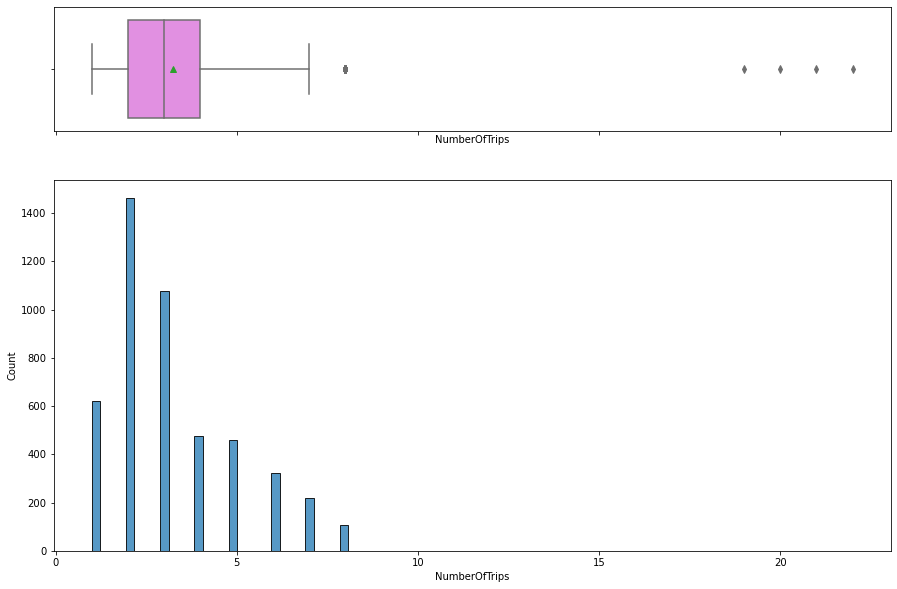

In [22]:
histBox(data, 'NumberOfTrips')

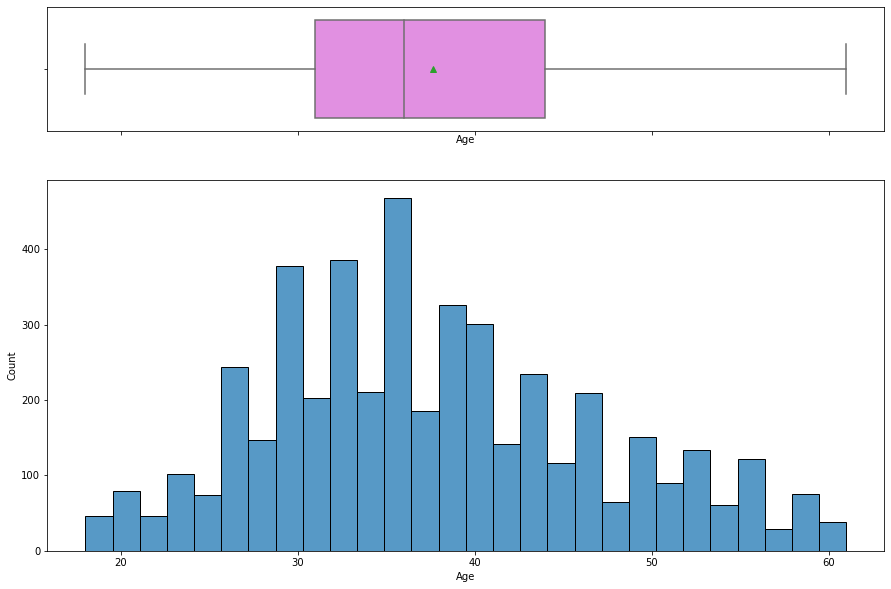

In [23]:
histBox(data, 'Age')

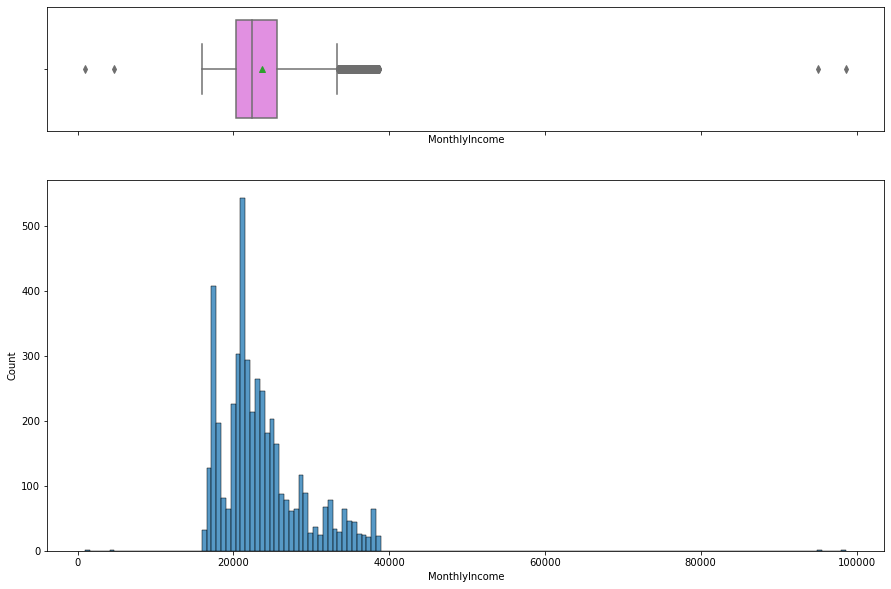

In [24]:
histBox(data, 'MonthlyIncome')

# Outliers that will need treatment
- Weve got a couple of outliers in Duration of pitch. Later on lets replace these with the medium.
- We have several outliers in Number of trips as well, we will replace above 6 with the medium value of 3.236521
- Age has a bit of curve to it
- We've got some strong outliers on both ends in Monthly Income. We will replace all incomes below 15,000 <> 40,000 with medium values

<AxesSubplot:>

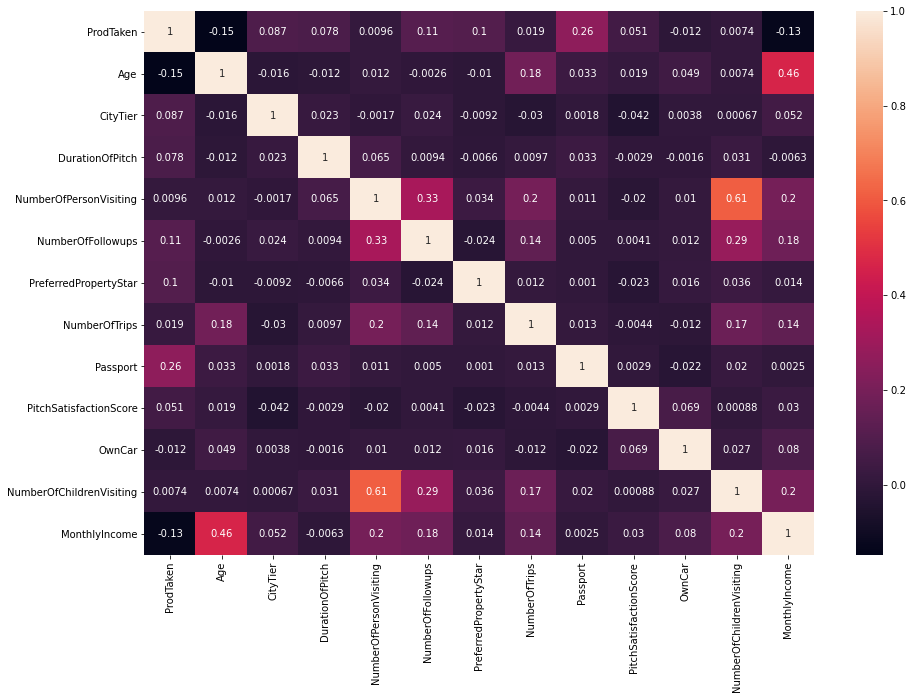

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

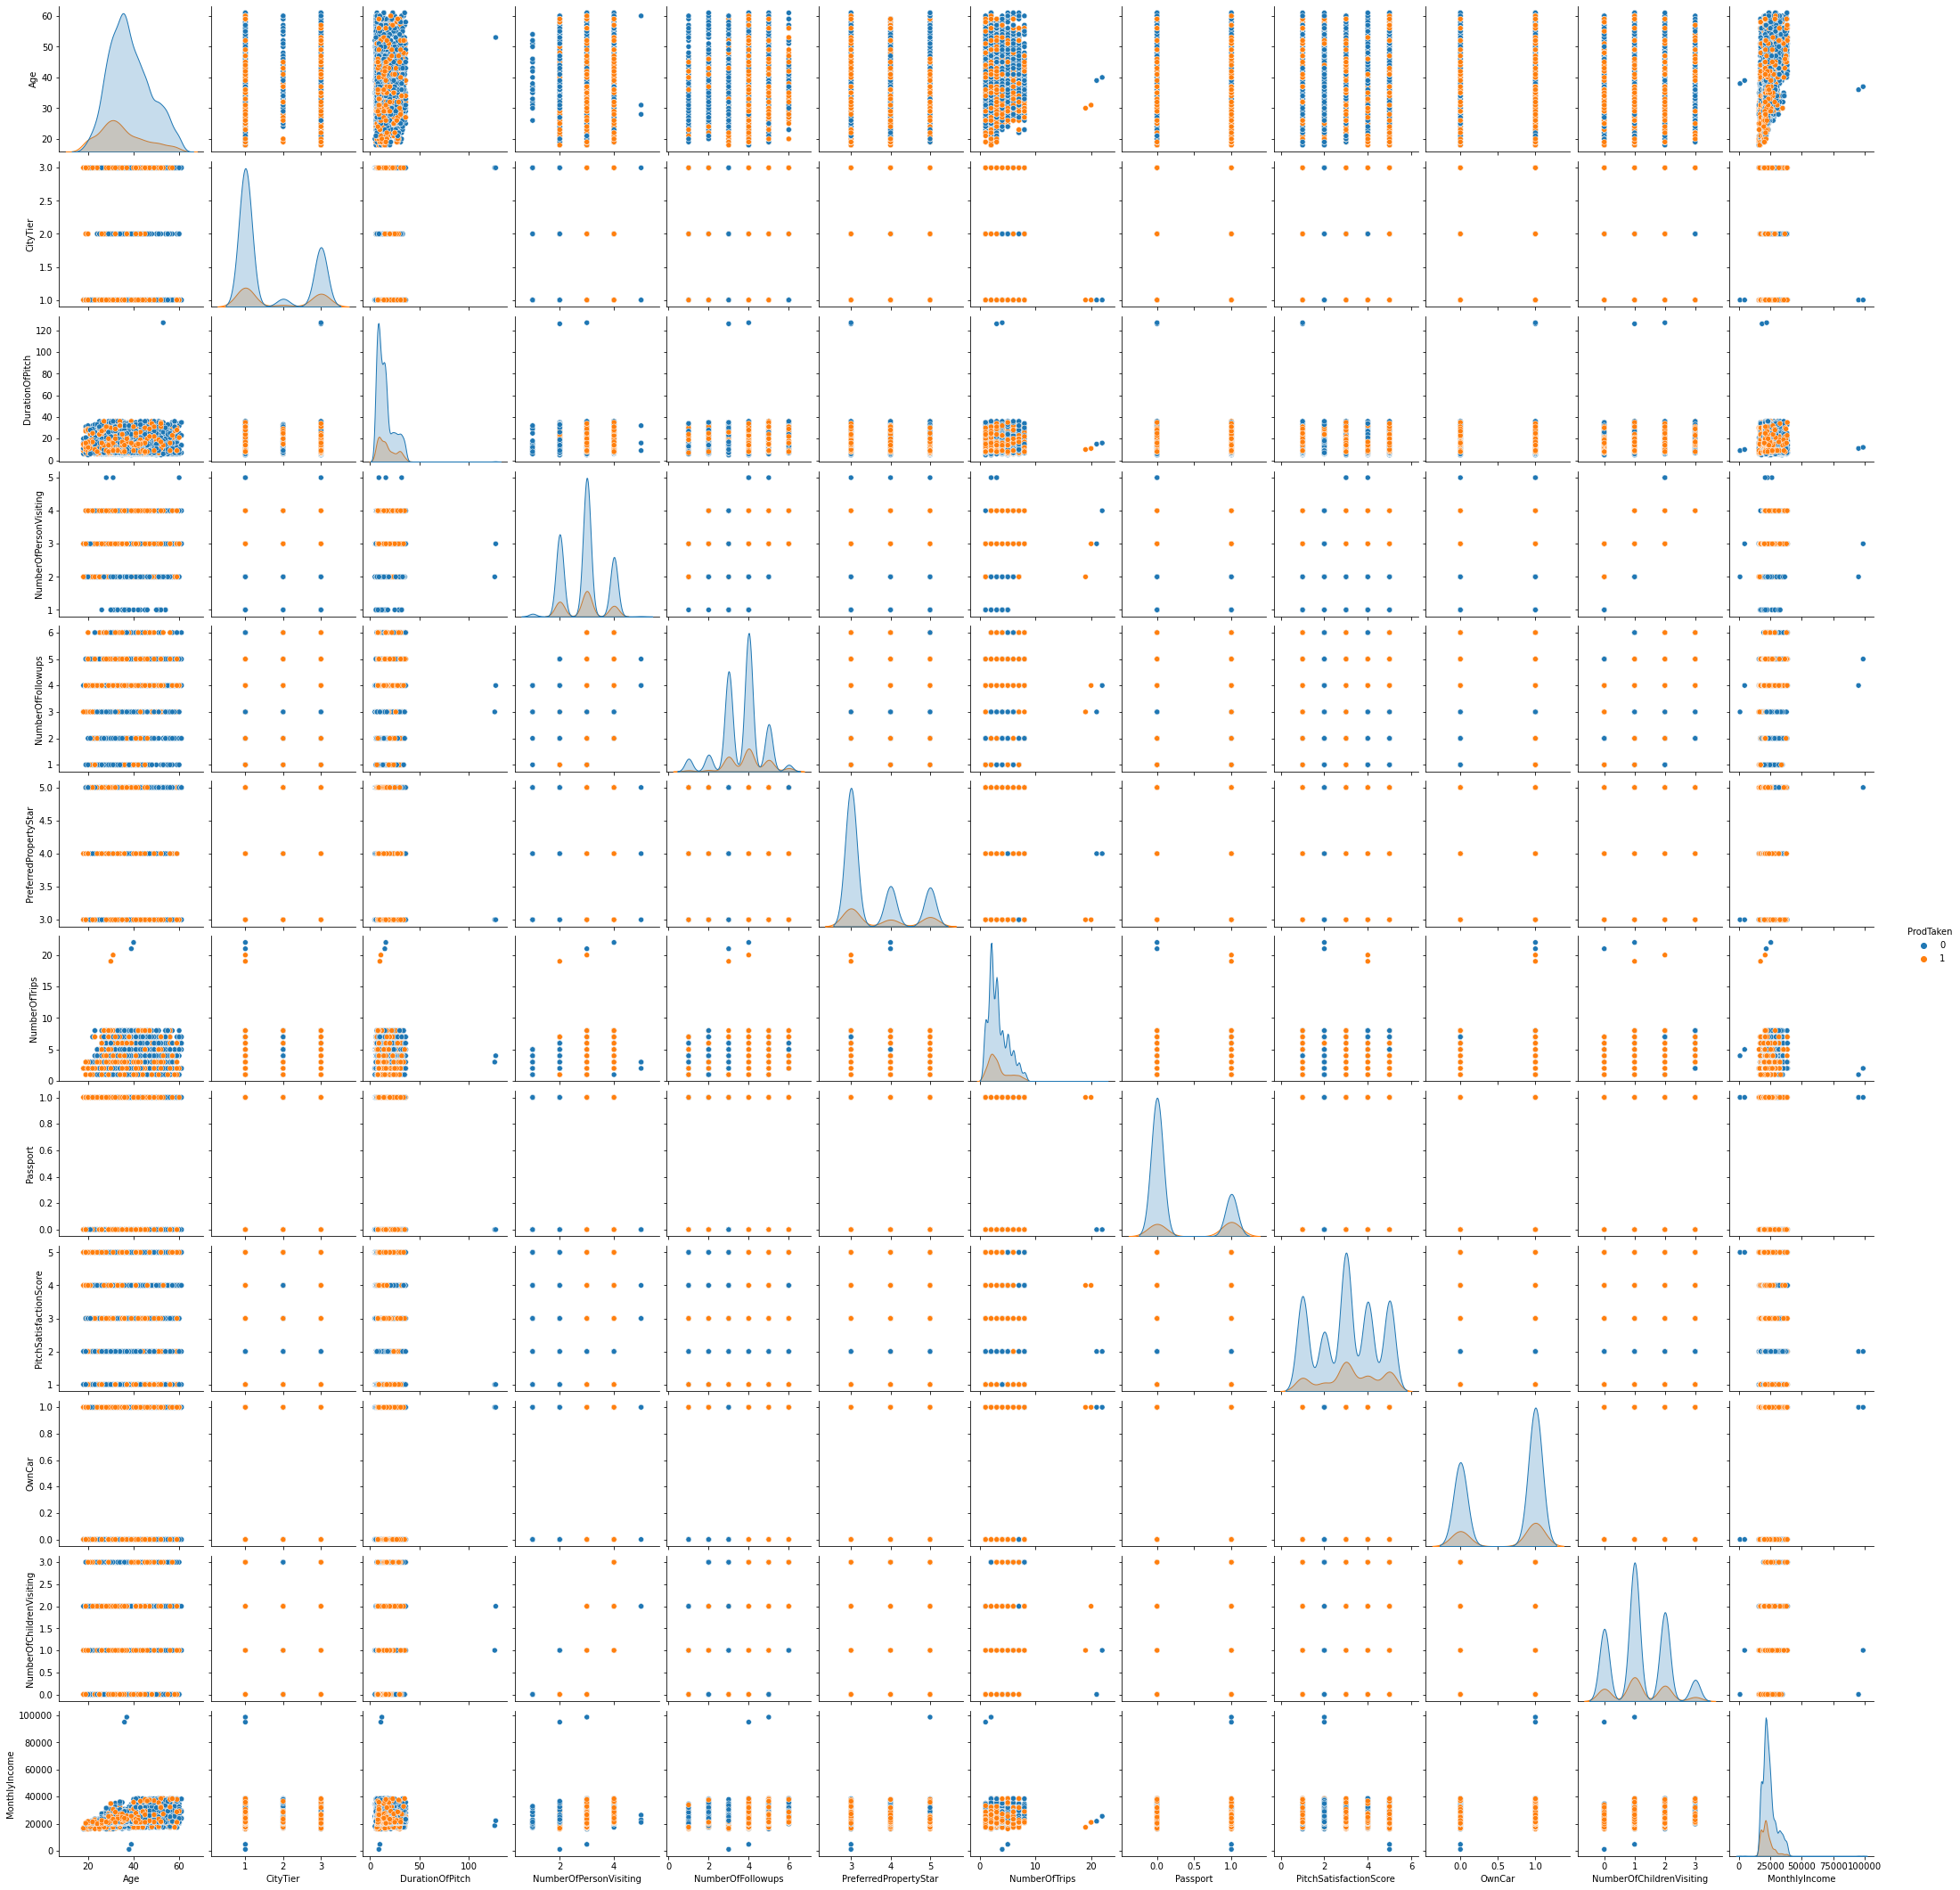

In [26]:
sns.pairplot(data,hue='ProdTaken')
plt.show()

### Bivariate Analysis

- There are very few intersting correlations here
- Age is very loosely related to income
- Number of persons visiting has a small correlation to Number of Children Visiting

### Customer Profile

- Comparisson ProductPitched to a number of factors such as 
        Age
        Type of Contact
        PitchSatisfactionScore
        Designation
        Monthly Income
        Follow Ups


#### Lets create seperate data frames for each type of profile

In [27]:
profiles = data.copy()

profiles.drop(profiles[profiles.ProdTaken == 0].index, inplace = True)     

In [28]:
profiles.tail(20)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0
4870,1,57.0,Self Enquiry,3,23.0,Salaried,Female,4,4.0,Standard,NaN,Single,4.0,1,5,1,3.0,Senior Manager,38395.0
4871,1,41.0,Self Enquiry,3,23.0,Small Business,Male,4,4.0,Standard,3.0,Married,4.0,0,5,0,2.0,Senior Manager,22222.0
4872,1,35.0,Company Invited,1,24.0,Large Business,Male,3,5.0,Basic,3.0,Married,2.0,1,5,1,2.0,Executive,27178.0
4873,1,41.0,Self Enquiry,3,14.0,Small Business,Male,3,4.0,Basic,4.0,Unmarried,3.0,0,5,0,1.0,Executive,23339.0
4874,1,42.0,Self Enquiry,1,15.0,Small Business,Female,4,4.0,Basic,5.0,Married,3.0,1,3,0,3.0,Executive,22781.0
4875,1,36.0,Company Invited,1,8.0,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,1,3,1,1.0,Executive,22927.0
4876,1,52.0,Self Enquiry,3,34.0,Salaried,Male,3,4.0,Deluxe,3.0,Single,3.0,1,5,1,2.0,Manager,32704.0
4877,1,39.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,5.0,Married,6.0,0,3,0,3.0,Manager,25571.0


In [137]:
# Function to create a bar plot of numerical vs cataegorical features
def vizClass(df, feature):
    df.groupby(by=[feature])['ProdTaken'].sum().reset_index().sort_values(['ProdTaken']).tail(10).plot(x=feature,
                                                                                                           y='ProdTaken',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

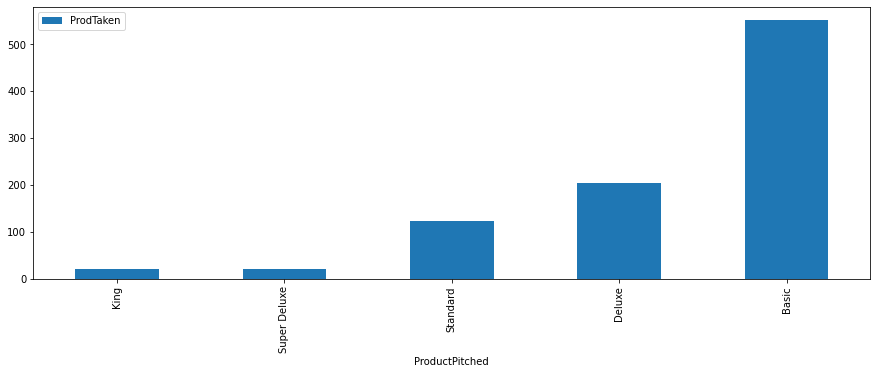

In [30]:
# Lets visulize how many customers are taking each product

vizClass(profiles, 'ProductPitched')

Most customers go for the Basic package, there are very few customers for the King or Super Deluxe packages

In [31]:
# Lets create specific data frames for each profile
basic = profiles.copy()   # new data frame to create a profile for customers of the basic product
standard = profiles.copy()   # new data frame to create a profile for customers of the standard product
deluxe = profiles.copy()   # new data frame to create a profile for customers of the deluxe product
superDeluxe = profiles.copy()   # new data frame to create a profile for customers of the superDeluxe product
king = profiles.copy()   # new data frame to create a profile for customers of the king product

basic.drop(basic[basic.ProductPitched != 'Basic'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
standard.drop(standard[standard.ProductPitched != 'Standard'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
deluxe.drop(deluxe[deluxe.ProductPitched != 'Deluxe'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
superDeluxe.drop(superDeluxe[superDeluxe.ProductPitched != 'Super Deluxe'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
king.drop(king[king.ProductPitched != 'King'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition

#### Basic Package Profile

In [32]:
basic.sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2126,1,32.0,Self Enquiry,1,31.0,Salaried,Male,2,3.0,Basic,3.0,Single,2.0,1,5,0,0.0,Executive,17795.0
4785,1,25.0,Self Enquiry,1,24.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,0,1,1,3.0,Executive,20888.0
1056,1,28.0,Company Invited,3,6.0,Large Business,Male,3,3.0,Basic,3.0,Divorced,4.0,0,3,1,0.0,Executive,17909.0
4550,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,1,2.0,Executive,20700.0
4581,1,42.0,Self Enquiry,1,9.0,Salaried,Female,3,6.0,Basic,3.0,Married,6.0,1,3,0,2.0,Executive,21456.0


In [33]:
basic.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,515.0,31.289320,9.070829,18.0,25.0,30.0,35.0,59.0
CityTier,552.0,1.510870,0.832566,1.0,1.0,1.0,2.0,3.0
DurationOfPitch,532.0,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
NumberOfPersonVisiting,552.0,2.905797,0.701439,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,548.0,3.950730,0.967166,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,552.0,3.771739,0.861812,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,547.0,3.226691,2.081618,1.0,2.0,3.0,4.0,20.0
Passport,552.0,0.583333,0.493454,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,552.0,3.213768,1.353074,1.0,2.0,3.0,4.0,5.0


In [34]:
basic.isnull().sum().sort_values(ascending=False)

Age                         37
MonthlyIncome               23
DurationOfPitch             20
NumberOfTrips                5
NumberOfFollowups            4
TypeofContact                3
NumberOfChildrenVisiting     1
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
ProdTaken                    0
MaritalStatus                0
PreferredPropertyStar        0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
CityTier                     0
ProductPitched               0
dtype: int64

In [35]:
basic.shape

(552, 19)

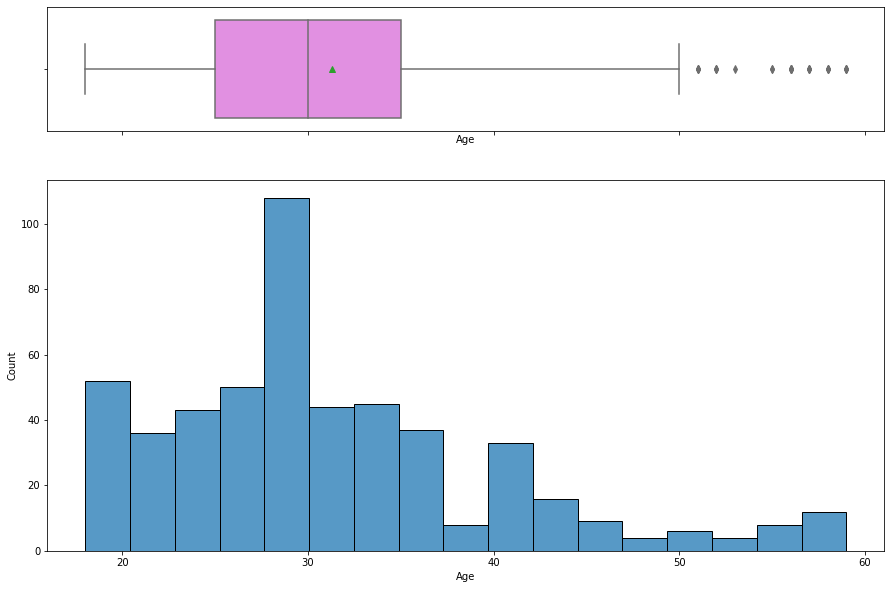

In [36]:
histBox(basic, 'Age')

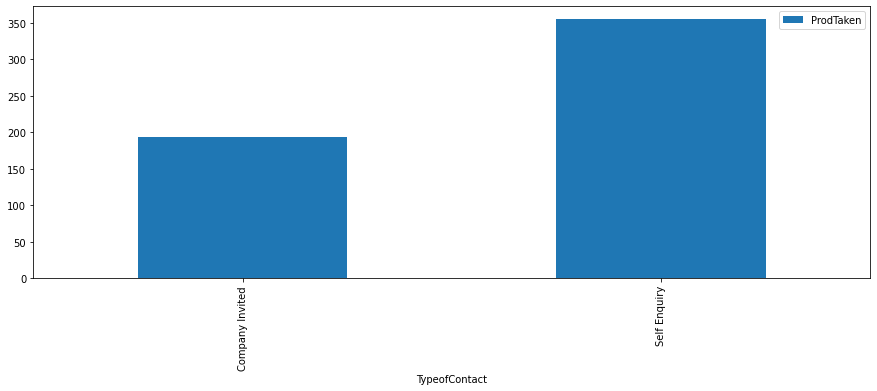

In [37]:
vizClass(basic, 'TypeofContact')

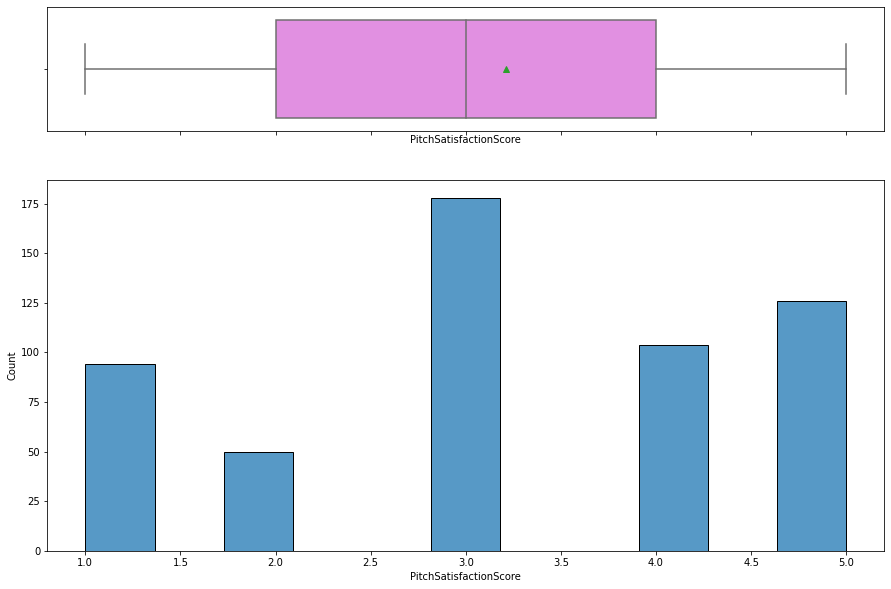

In [38]:
histBox(basic, 'PitchSatisfactionScore')

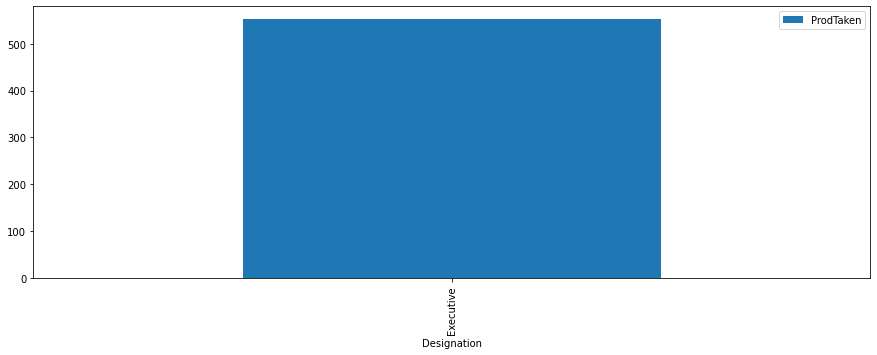

In [39]:
vizClass(basic,'Designation')

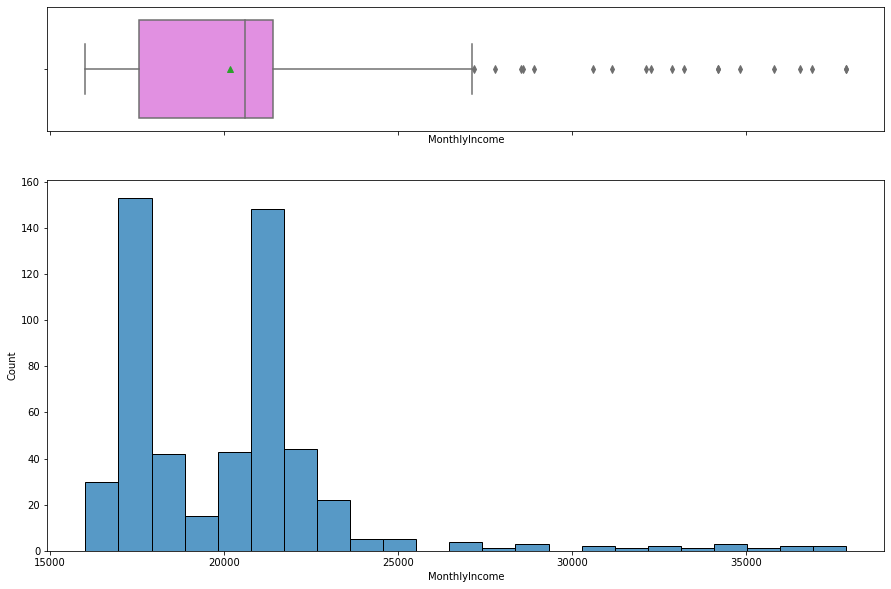

In [40]:
histBox(basic,'MonthlyIncome')

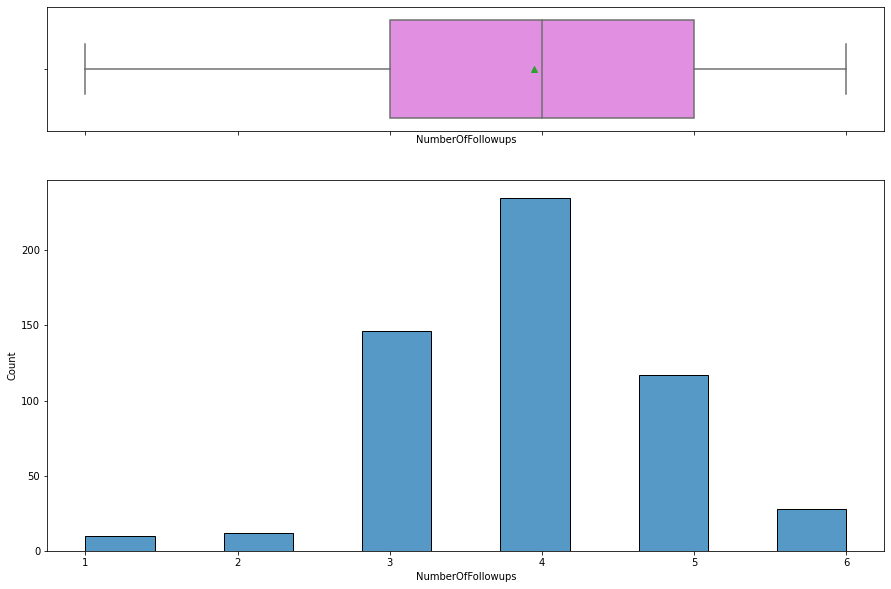

In [41]:
histBox(basic,'NumberOfFollowups')

##### Basic Package Customer Profile  Analysis

1) Basic is our most populare product and makes up over half of our sales <br>
2) The largest range of customers is between 25 - 35 <br>
3) Most customers will visit tier 1 & 2 citites <br>
4) Most customers will need a pitch of less than 22 minutes <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 16,000 & 21400 <br>
7) Executives are the only customers picking this package <br>
8) Around 70% of customers were self initiated <br>
--------------------------------------------------

#### Standard Package Profile

In [42]:
standard.sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4694,1,29.0,Company Invited,1,31.0,Large Business,Male,4,5.0,Standard,5.0,Unmarried,3.0,0,1,1,2.0,Senior Manager,27400.0
2382,1,26.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,Standard,5.0,Married,1.0,1,4,1,1.0,Senior Manager,17875.0
4354,1,35.0,Company Invited,2,30.0,Salaried,Female,3,4.0,Standard,5.0,Married,2.0,1,3,1,1.0,Senior Manager,28628.0
780,1,28.0,Company Invited,1,30.0,Large Business,Male,3,4.0,Standard,5.0,Unmarried,2.0,0,2,0,0.0,Senior Manager,23722.0
695,1,37.0,Self Enquiry,3,6.0,Salaried,Male,2,4.0,Standard,3.0,Divorced,6.0,0,2,1,1.0,Senior Manager,25609.0


In [43]:
standard.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,123.0,41.008130,9.876695,19.0,33.00,38.0,49.00,60.0
CityTier,124.0,2.096774,0.966255,1.0,1.00,3.0,3.00,3.0
DurationOfPitch,123.0,19.065041,9.048811,6.0,11.00,17.0,29.00,36.0
NumberOfPersonVisiting,124.0,2.967742,0.709236,2.0,2.00,3.0,3.00,4.0
NumberOfFollowups,124.0,3.935484,0.908335,1.0,3.00,4.0,4.25,6.0
PreferredPropertyStar,123.0,3.731707,0.878460,3.0,3.00,3.0,5.00,5.0
NumberOfTrips,123.0,3.016260,1.815163,1.0,2.00,2.0,4.00,8.0
Passport,124.0,0.387097,0.489062,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,124.0,3.467742,1.309350,1.0,3.00,3.0,5.00,5.0


In [44]:
standard.isnull().sum().sort_values(ascending=False)

NumberOfChildrenVisiting    1
DurationOfPitch             1
NumberOfTrips               1
Age                         1
PreferredPropertyStar       1
ProdTaken                   0
MaritalStatus               0
Designation                 0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
ProductPitched              0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

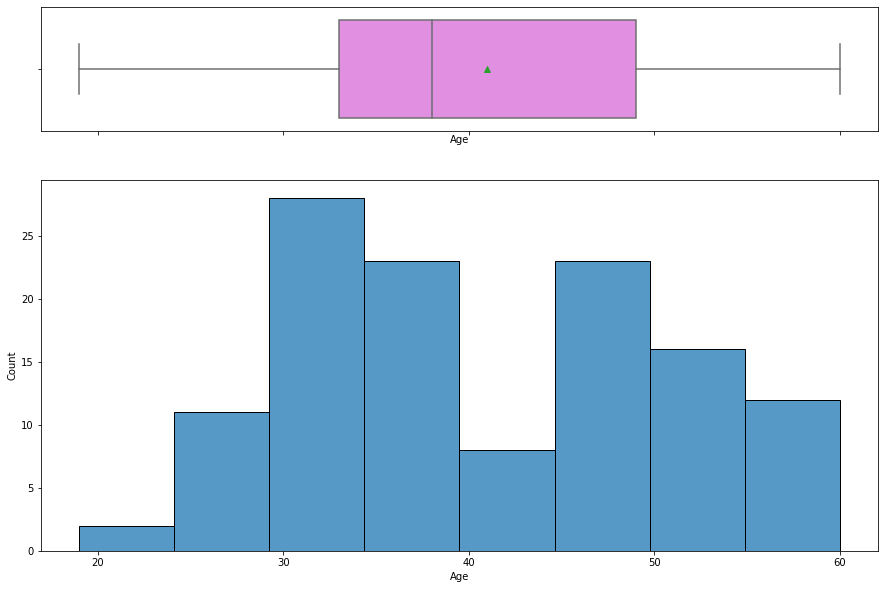

In [45]:
histBox(standard,'Age')

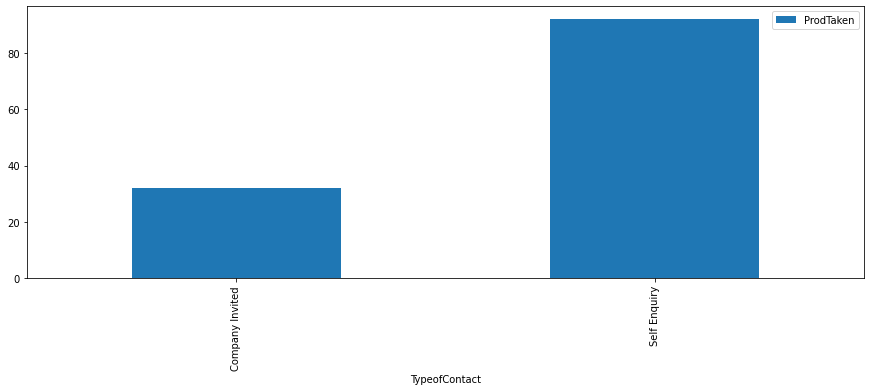

In [46]:
vizClass(standard, 'TypeofContact')

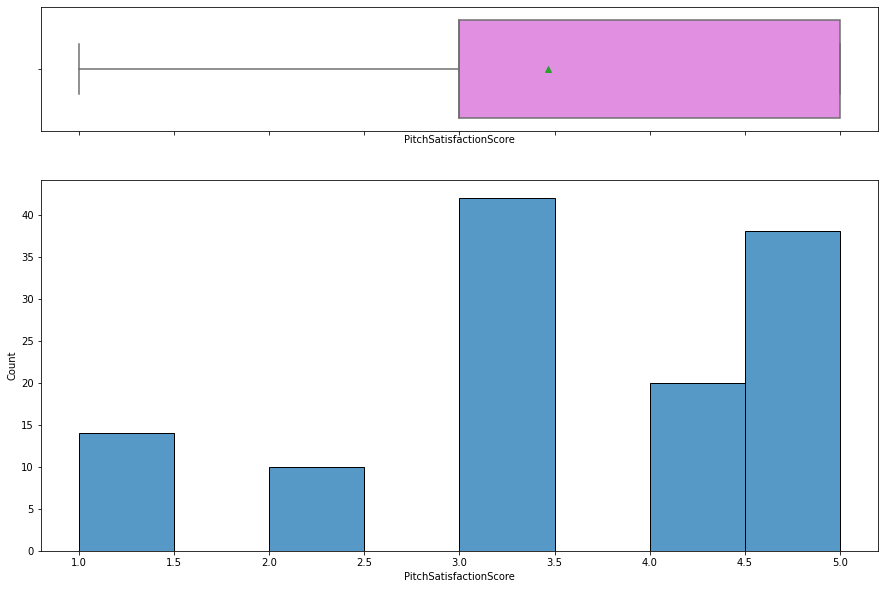

In [47]:
histBox(standard,'PitchSatisfactionScore')

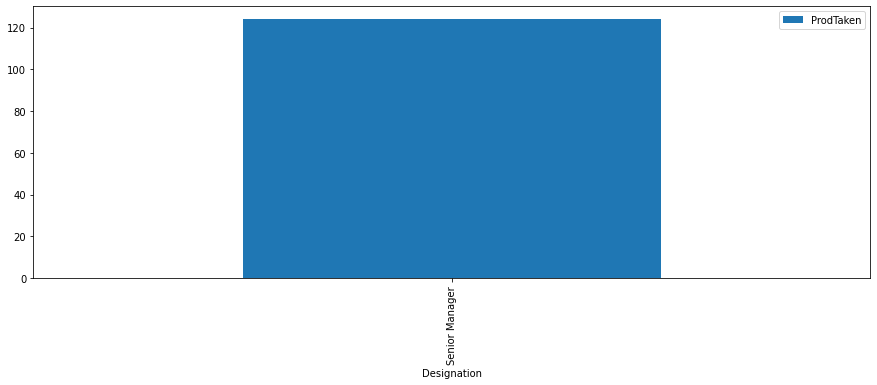

In [48]:
vizClass(standard,'Designation')

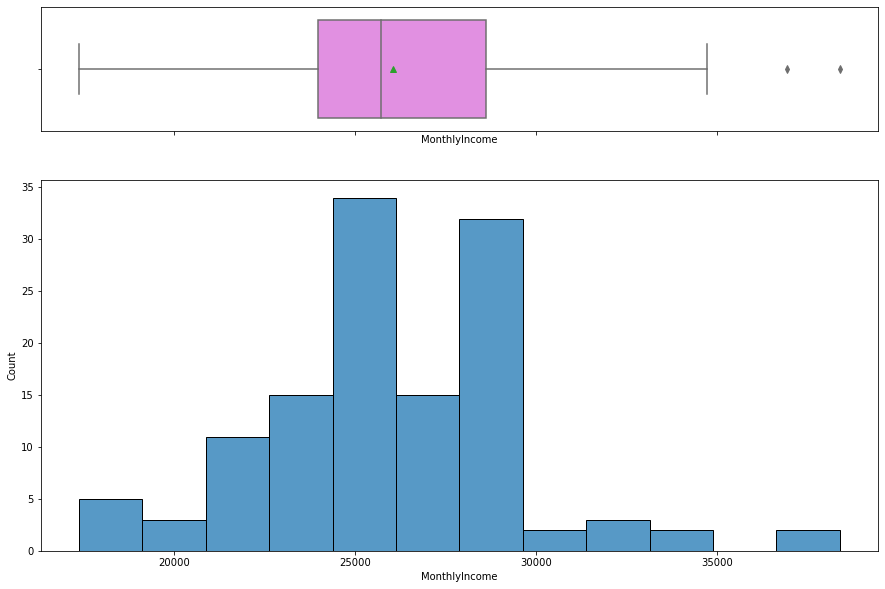

In [49]:
histBox(standard,'MonthlyIncome')

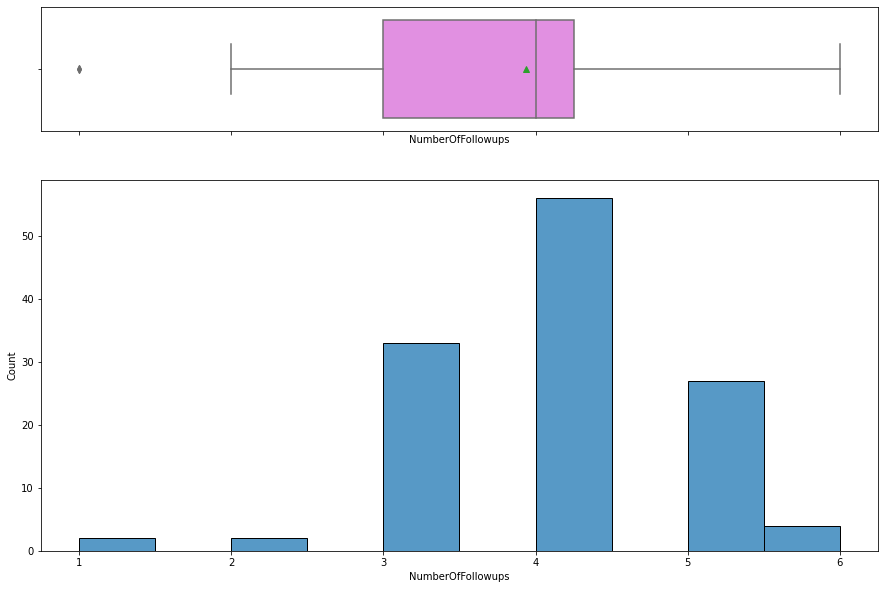

In [50]:
histBox(standard,'NumberOfFollowups')

##### Standard Package Customer Profile Analysis
1) Standard is our 3rd product in popularity <br>
2) The largest range of customers is between 33 - 49 <br>
3) Customers visit all tiers of cities <br>
4) Most customers will need a pitch of less than 29 minutes <br>
5) On average it will take 4 follow ups to close the date <br>
6) Most customers have a monthly income between 23,900 to 29000 <br>
7) Senior Managers are the only customers picking this package <br>
8) Roughly 75% of customers were self inquiries <br>
--------------------------------------------------

#### Deluxe Package Profile

In [51]:
deluxe.sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3425,1,36.0,Company Invited,3,25.0,Small Business,Female,4,4.0,Deluxe,3.0,Divorced,2.0,1,5,1,3.0,Manager,23292.0
4118,1,39.0,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,5.0,Married,2.0,1,3,1,3.0,Manager,25351.0
204,1,38.0,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Deluxe,5.0,Divorced,1.0,1,3,0,1.0,Manager,21673.0
1291,1,NaN,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Deluxe,5.0,Single,2.0,0,4,0,0.0,Manager,NaN
3742,1,47.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,3.0,Manager,27604.0


In [52]:
deluxe.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,198.0,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
CityTier,204.0,2.411765,0.913532,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,180.0,19.100000,9.227176,6.0,11.0,16.0,28.0,36.0
NumberOfPersonVisiting,204.0,2.950980,0.707141,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,200.0,3.970000,1.051011,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,203.0,3.699507,0.857899,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,202.0,3.702970,2.022483,1.0,2.0,3.0,5.0,8.0
Passport,204.0,0.490196,0.501134,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,204.0,3.039216,1.278250,1.0,2.0,3.0,4.0,5.0


In [53]:
deluxe.isnull().sum().sort_values(ascending=False)

DurationOfPitch             24
MonthlyIncome                9
Age                          6
NumberOfFollowups            4
NumberOfTrips                2
NumberOfChildrenVisiting     1
PreferredPropertyStar        1
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
ProdTaken                    0
MaritalStatus                0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
CityTier                     0
TypeofContact                0
ProductPitched               0
dtype: int64

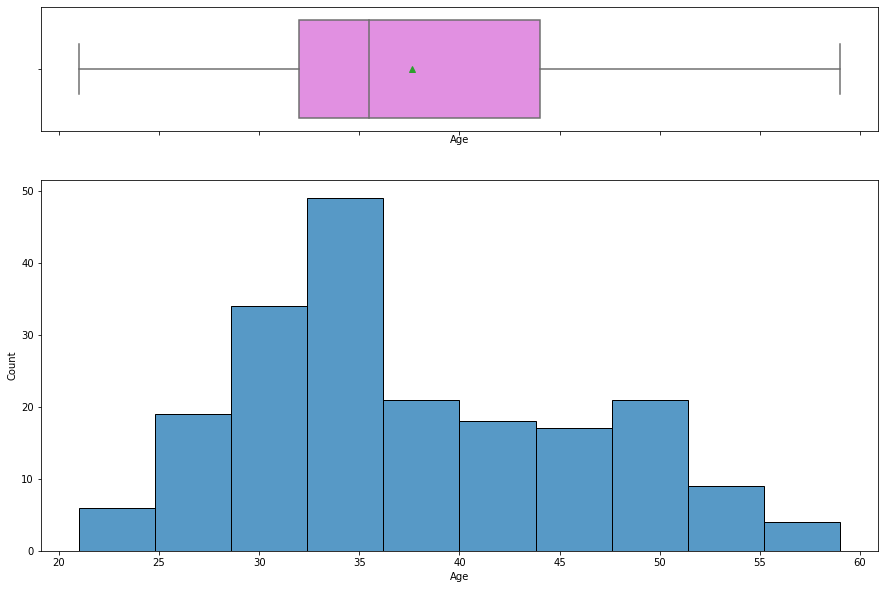

In [54]:
histBox(deluxe, 'Age')

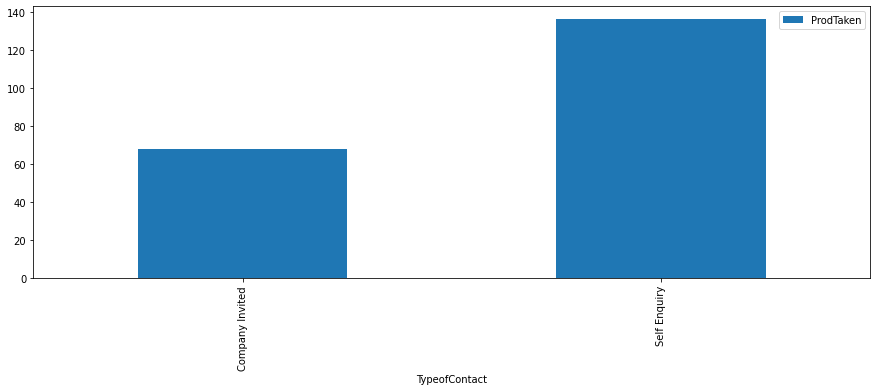

In [55]:
vizClass(deluxe, 'TypeofContact')

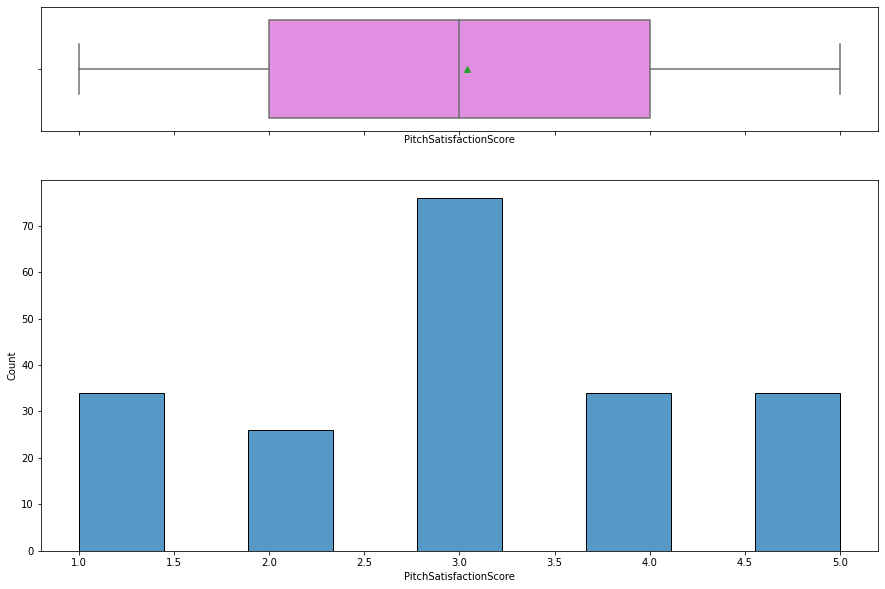

In [56]:
histBox(deluxe, 'PitchSatisfactionScore')

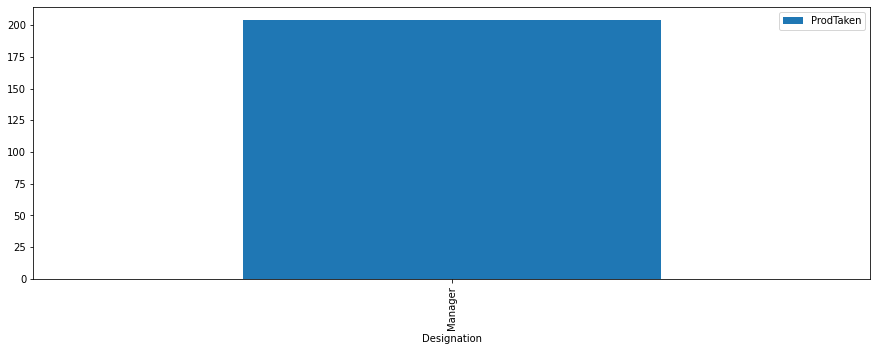

In [57]:
vizClass(deluxe,'Designation')

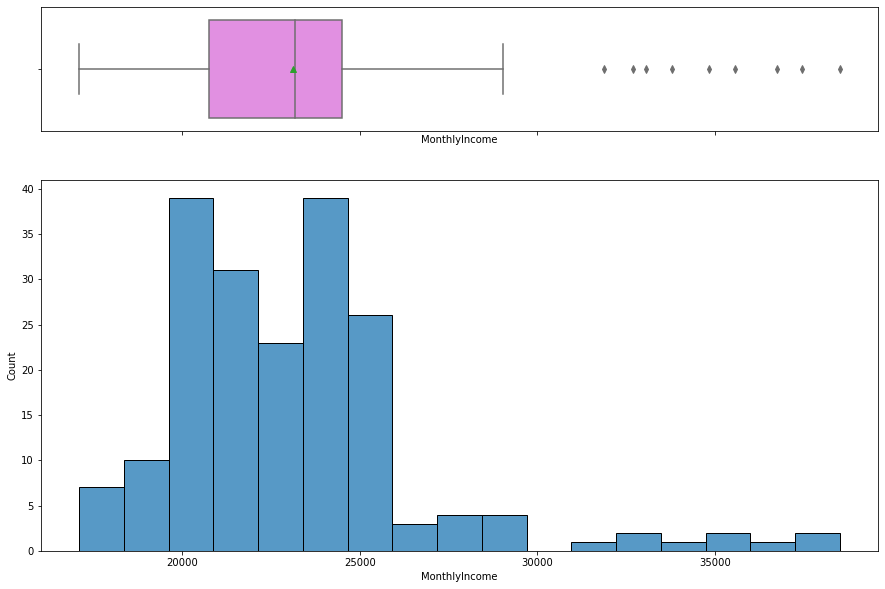

In [58]:
histBox(deluxe,'MonthlyIncome')

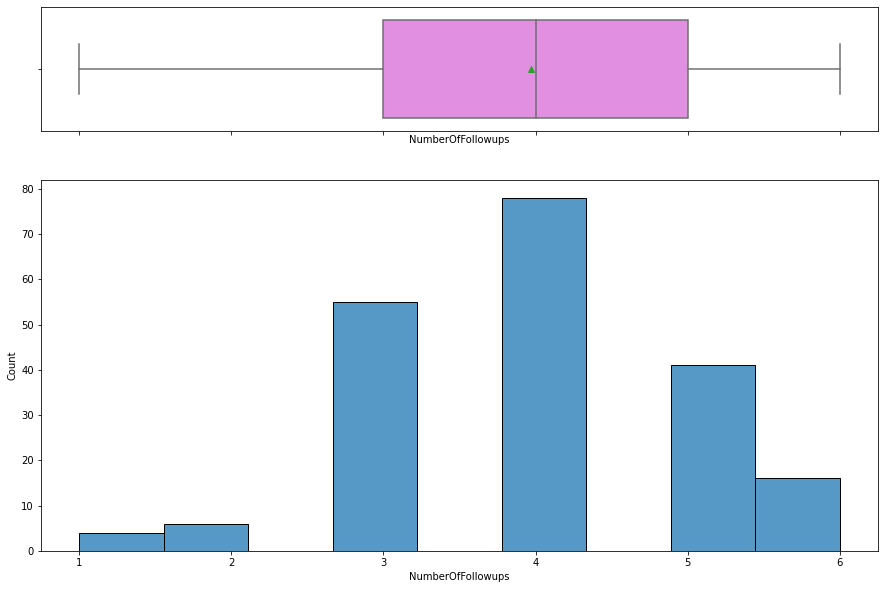

In [59]:
histBox(deluxe,'NumberOfFollowups')

##### Deluxe Package Customer Profile Analysis

1) Deluxe is our 2nd most populare product making up over 20% of our sales <br>
2) The largest range of customers is between 32 - 44 <br>
3) Most customers will visit all tires of cities <br>
4) Most customers will need a pitch of less than 28 minutes <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 20,500 & 24,500 <br>
7) Managers are the only customers picking this package <br>
8) Roughly 70% of customers were self inquiries <br>
--------------------------------------------------

#### Super Deluxe Package Profile

In [60]:
superDeluxe.sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3150,1,41.0,Company Invited,3,31.0,Salaried,Female,4,2.0,Super Deluxe,4.0,Single,6.0,1,3,1,3.0,AVP,31872.0
2421,1,41.0,Company Invited,3,15.0,Salaried,Male,2,5.0,Super Deluxe,3.0,Married,1.0,0,5,1,1.0,AVP,21151.0
3282,1,43.0,Company Invited,3,19.0,Salaried,Male,3,4.0,Super Deluxe,5.0,Single,2.0,1,5,1,2.0,AVP,32436.0
2383,1,45.0,Self Enquiry,3,19.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,7.0,1,3,1,0.0,AVP,33824.0
3667,1,48.0,Company Invited,3,16.0,Salaried,Male,3,6.0,Super Deluxe,3.0,Married,2.0,0,5,1,2.0,AVP,31614.0


In [61]:
superDeluxe.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
Age,20.0,43.500000,4.839530,39.0,40.0,42.0,45.25,56.0
CityTier,20.0,2.600000,0.820783,1.0,3.0,3.0,3.00,3.0
DurationOfPitch,20.0,18.500000,7.330542,8.0,15.0,18.5,20.00,31.0
NumberOfPersonVisiting,20.0,2.700000,0.656947,2.0,2.0,3.0,3.00,4.0
NumberOfFollowups,20.0,3.100000,1.618967,1.0,2.0,3.0,4.00,6.0
PreferredPropertyStar,20.0,3.600000,0.820783,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,19.0,3.263158,2.490919,1.0,1.0,2.0,5.50,8.0
Passport,20.0,0.600000,0.502625,0.0,0.0,1.0,1.00,1.0
PitchSatisfactionScore,20.0,3.800000,1.005249,3.0,3.0,3.0,5.00,5.0


In [62]:
superDeluxe.isnull().sum().sort_values(ascending=False)

NumberOfTrips               1
ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

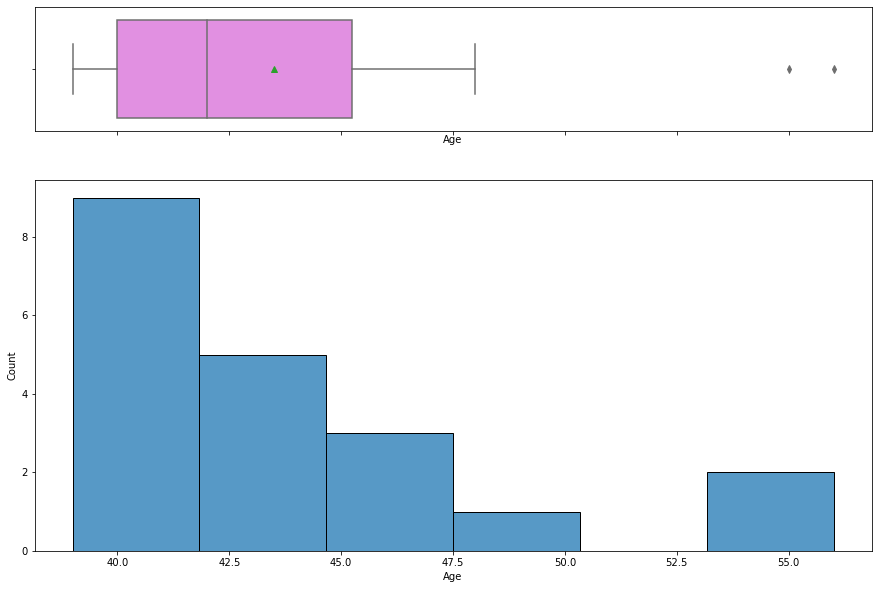

In [63]:
histBox(superDeluxe, 'Age')

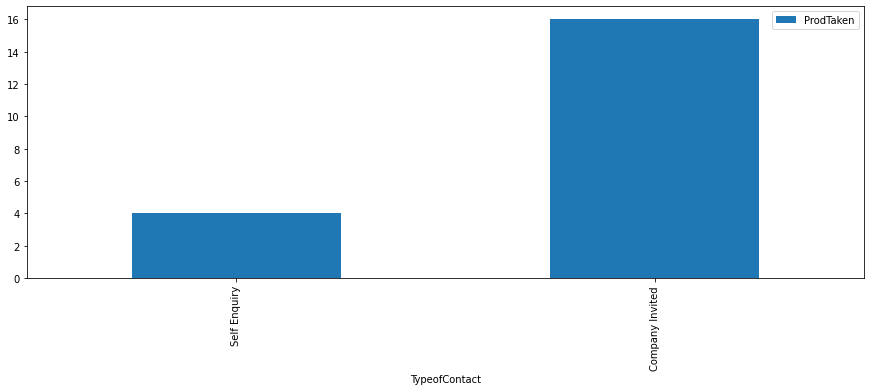

In [64]:
vizClass(superDeluxe, 'TypeofContact')

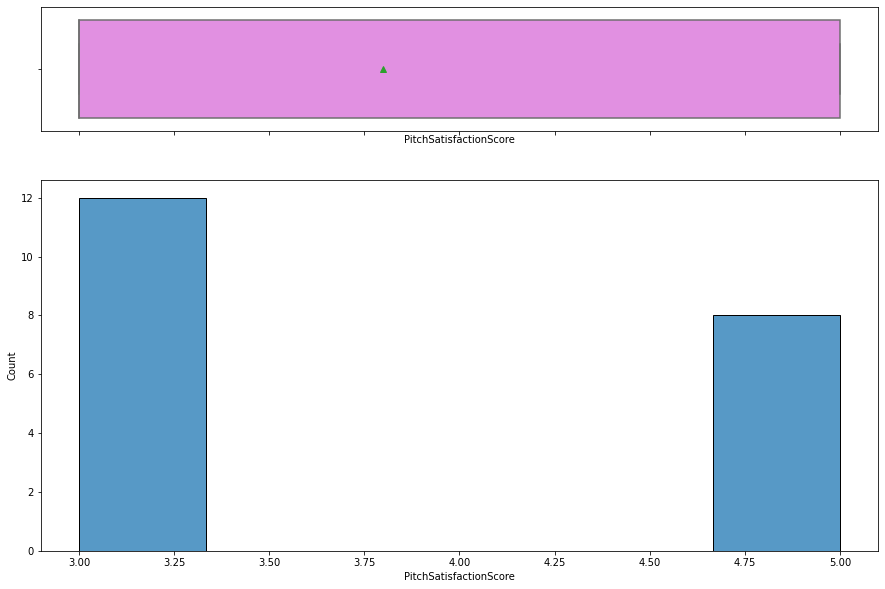

In [65]:
histBox(superDeluxe, 'PitchSatisfactionScore')

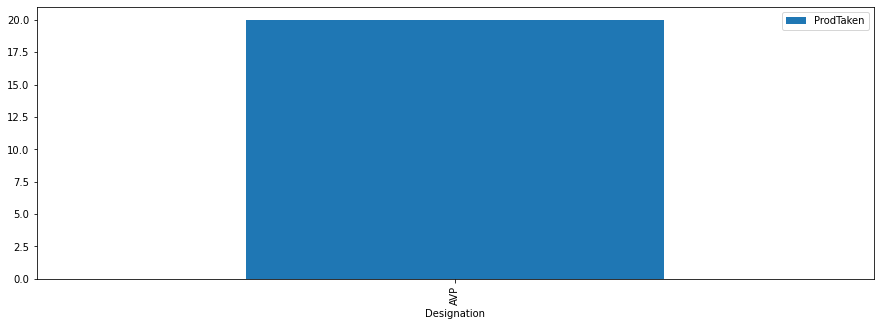

In [66]:
vizClass(superDeluxe,'Designation')

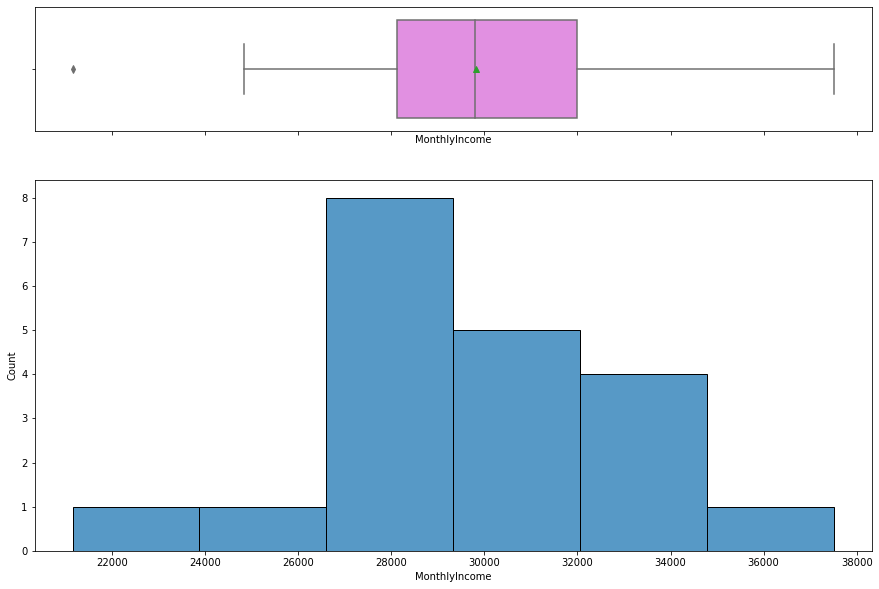

In [67]:
histBox(superDeluxe,'MonthlyIncome')

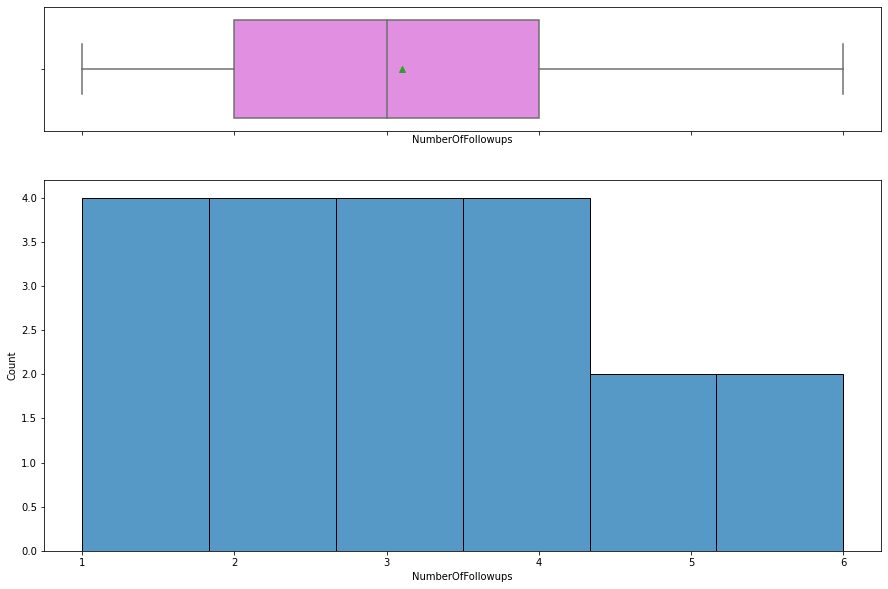

In [68]:
histBox(superDeluxe,'NumberOfFollowups')

##### Super Deluxe Package Customer Profile Analysis

1) Very few customers pick the Super Deluxe Package <br>
2) The largest range of customers is between 40 - 45 <br>
3) Most customers will only almost exclusively visit tier 3 cities <br>
4) Most customers will need a pitch of less than 20 minutes <br>
5) On average it will take 3 follow ups to close the deal <br>
6) Most customers have a monthly income between 28,000 - 32,000 <br>
7) AVPs are the only customers picking this package <br>
8) 80% of customers were company invited <br>

--------------------------------------------------

#### King Package Profile

In [69]:
king.sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2219,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Married,2.0,0,3,1,NaN,VP,34845.0
4816,1,28.0,Self Enquiry,3,9.0,Small Business,Female,4,6.0,King,4.0,Single,4.0,1,5,1,2.0,VP,21195.0
4482,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Married,7.0,1,1,1,1.0,VP,38537.0
3357,1,46.0,Self Enquiry,3,9.0,Small Business,Female,4,6.0,King,4.0,Single,NaN,1,5,0,3.0,VP,37502.0
4663,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Married,3.0,0,3,1,2.0,VP,38523.0


In [70]:
king.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,20.0,48.900000,9.618513,27.0,42.00,52.5,56.0,59.0
CityTier,20.0,1.800000,1.005249,1.0,1.00,1.0,3.0,3.0
DurationOfPitch,20.0,10.500000,4.135851,8.0,8.00,9.0,9.0,19.0
NumberOfPersonVisiting,20.0,2.900000,0.718185,2.0,2.00,3.0,3.0,4.0
NumberOfFollowups,20.0,4.300000,1.128576,3.0,3.00,4.0,5.0,6.0
PreferredPropertyStar,16.0,3.750000,0.683130,3.0,3.00,4.0,4.0,5.0
NumberOfTrips,17.0,3.411765,1.938389,1.0,2.00,3.0,4.0,7.0
Passport,20.0,0.600000,0.502625,0.0,0.00,1.0,1.0,1.0
PitchSatisfactionScore,20.0,3.300000,1.218282,1.0,3.00,3.0,4.0,5.0


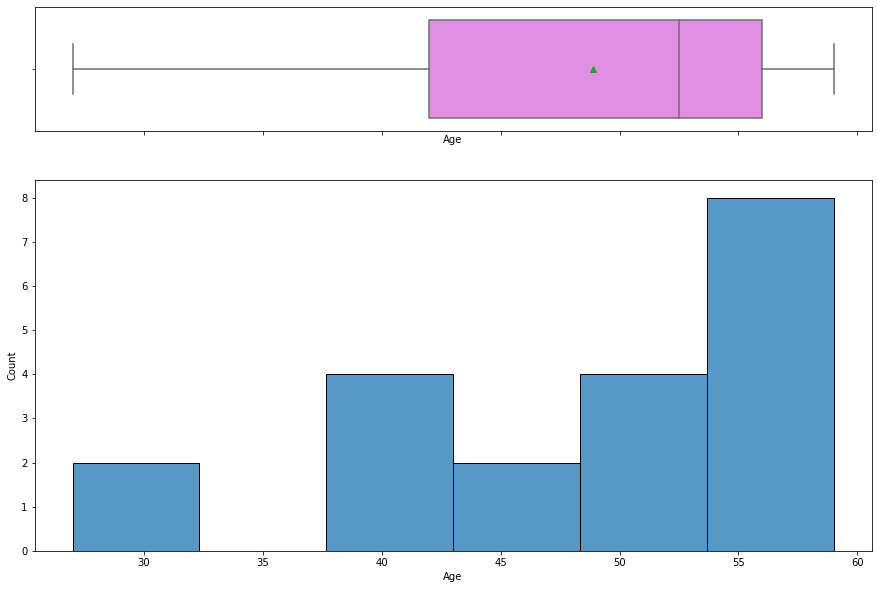

In [71]:
histBox(king, 'Age')

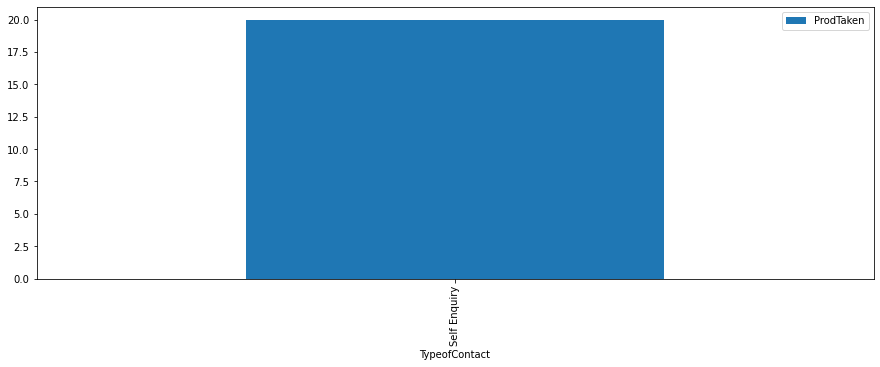

In [72]:
vizClass(king, 'TypeofContact')

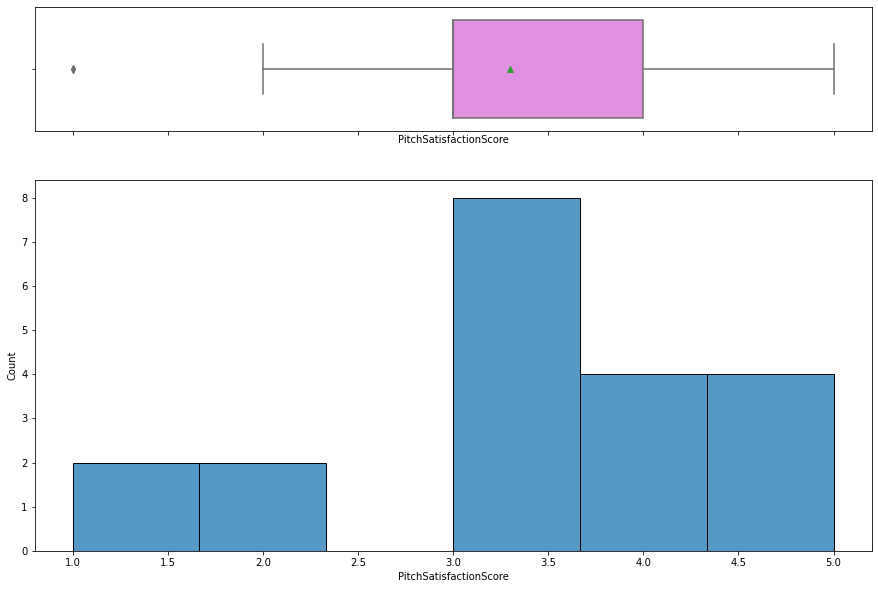

In [73]:
histBox(king, 'PitchSatisfactionScore')

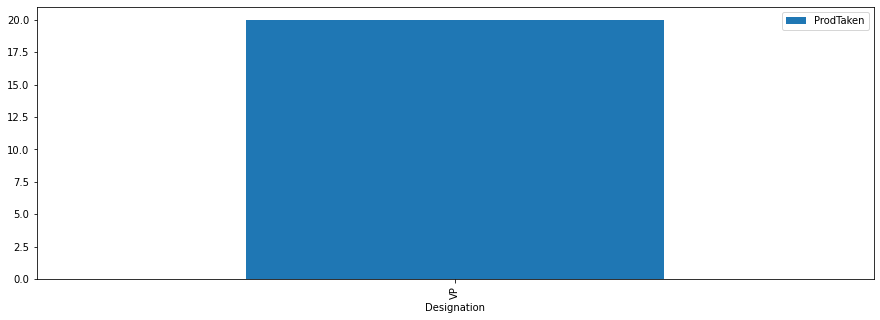

In [74]:
vizClass(king,'Designation')

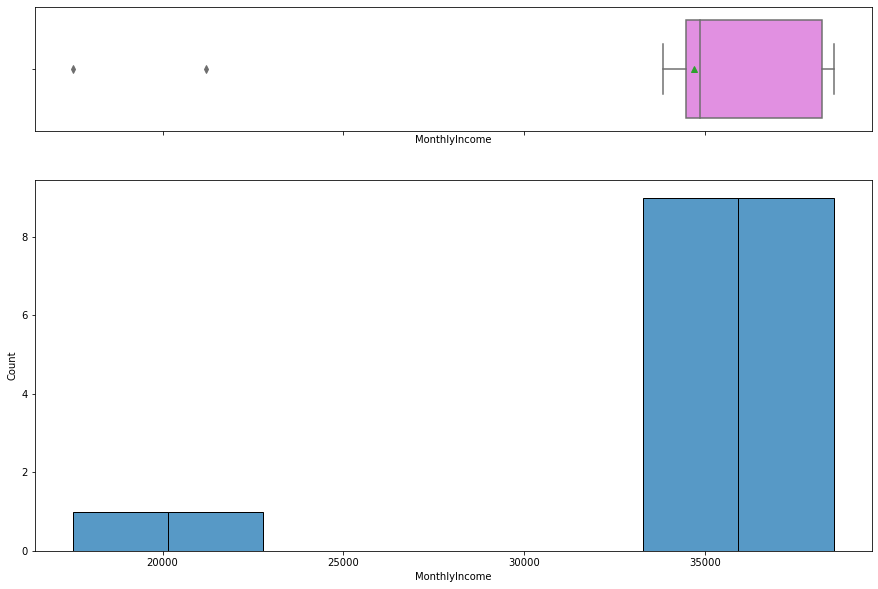

In [75]:
histBox(king,'MonthlyIncome')

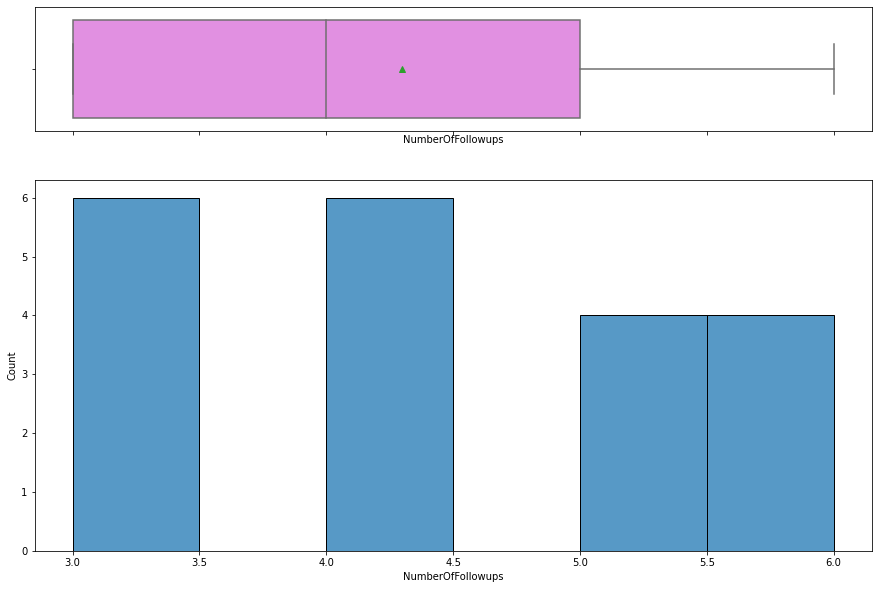

In [76]:
histBox(king,'NumberOfFollowups')

##### King Package Customer Profile Analysis
1) Very few customers pick the King package <br>
2) The largest range of customers is between 42 - 46 <br>
3) 50% of customers will visit tier 1 cities <br>
4) Most customers will need a pitch of less than 9 minutes making them group with lowest pitch <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 34,400 - 38,000 <br>
7) VPs are the only customers picking this package <br>
8) All customers were self inquires  <br>

--------------------------------------------------

### Interesting thoughts on customers as a whole

- Each package only has 1 type of customer, this give us very easy to define targeting information of customers
- The vast majority of our customers self iniated contact, our marketing may not be very effective
- The basic package is by far our biggest seller
- Few trips are to tier 2 cities
- Very few people taking these trips are free lancers and may not be a good target
- Very few trips were take to visit 1 or 5 people, most trips are taken to visit 2-4 people
- 50% of customers are between 31 - 44
- The average pitch was 15 minutes

## Data Preprocessing

## What we will do in this section

### Data Errors
- Replace  "Fe male" with "Female" in gender column
- Replace missing values in every column <br>
1) DurationOfPitch - will be a dropped column  <br>
2) NumberOfFollowups - will be a dropped column <br>
3) MonthlyIncome - 23619.853491 <br>
4) Age - 37.622265 <br>
5) NumberOfTrips - 3.236521 <br>
6) NumberOfChildrenVisiting - 1.187267 <br>
7) PreferredPropertyStar - 3.581037 <br>
8) TypeofContact - drop rows due to small number of these in the data set <br>
   
### Outliers that will need treatment
- Weve got a couple of outliers in Duration of pitch. But will drop this coloumn anyways since this is customer interaction data and not stricly customer data needed for a customer model. Duration of Pitch would be more useful in a sales model
- We have several outliers in Number of trips as well, we will replace above 6 with the medium value of 3.236521
- We have some extreme values in Monthly income such as an average income of 23619.853491 but a max of 98,678 which is almost 4x the 75% quartile. We will replace all incomes > 40,000 with the medium value of 23619.853491 

### Drop Columns
1) DurationOfPitch <br>
2) NumberOfFollowups <br>
3) ProductPitched <br>
4) PitchSatisfactionScore  <br>

#### Treatment of Data Errors & Droping identified columns not needed

In [77]:
# Replace Fe Male with Female in the Gender Column
data.replace(to_replace="Fe Male", value='Female', inplace=True)

In [78]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [79]:
#Drop Columns that are customer interaction data, these are not strictly Customer Data and while useful information are not pertinent to customer only model
data.drop(['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'], axis = 1, inplace=True)

In [80]:
# Replace missing values with the mean
data['MonthlyIncome'].fillna(int(data['MonthlyIncome'].mean()), inplace=True)
data['Age'].fillna(int(data['Age'].mean()), inplace=True)
data['NumberOfTrips'].fillna(int(data['NumberOfTrips'].mean()), inplace=True)
data['NumberOfChildrenVisiting'].fillna(int(data['NumberOfChildrenVisiting'].mean()), inplace=True)
data['PreferredPropertyStar'].fillna(int(data['PreferredPropertyStar'].mean()), inplace=True)

In [81]:
# Drop all rows with missing values left in the data set
data.dropna(inplace=True)

In [82]:
# Checking to make sure all null values have been treated
data.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#### Outlier Treatment

In [83]:
#   Treat outliers in the Number of Trips and Monthly Income columns
data['NumberOfTrips'] = np.where(data['NumberOfTrips'] >= 6, 6, data['NumberOfTrips'])
data['MonthlyIncome'] = np.where(data['MonthlyIncome'] >= 40000, 23619.853491 , data['MonthlyIncome'])

In [84]:
#   Checking to make sure the max value for the treated columns has been changed to what is expected
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4863.0,0.188567,0.391204,0.0,0.0,0.0,0.0,1.0
Age,4863.0,37.632120,9.099103,18.0,31.0,37.0,43.0,61.0
CityTier,4863.0,1.654329,0.916498,1.0,1.0,1.0,3.0,3.0
NumberOfPersonVisiting,4863.0,2.908081,0.724762,1.0,2.0,3.0,3.0,5.0
PreferredPropertyStar,4863.0,3.578655,0.796907,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4863.0,3.131812,1.567126,1.0,2.0,3.0,4.0,6.0
Passport,4863.0,0.292412,0.454917,0.0,0.0,0.0,1.0,1.0
OwnCar,4863.0,0.620605,0.485286,0.0,0.0,1.0,1.0,1.0
NumberOfChildrenVisiting,4863.0,1.187744,0.852271,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4863.0,23589.704238,5050.321453,1000.0,20479.0,22637.0,25445.0,38677.0


In [85]:
#   Lets do one last check before moving on
data.isnull().T.any().T.sum()

0

### Function to compute various performance metrics

In [86]:
def model_performance_classification_sklearn(model, x, y):

    prediction = model.predict(x)

    accuracy = accuracy_score(y, prediction)
    recall = recall_score(y, prediction)
    precision = precision_score(y, prediction)
    f1 = f1_score(y, prediction)

    performance = pd.DataFrame({"Accuracy": accuracy,"Recall": recall,"Precision": precision,"F1": f1,},index=[0],)

    return performance

## Model Building - Bagging

### From the published Rburics Tracker

- 1) Train the decision tree classifier with default parameters and comment on model performance(1)
- 2) Train the bagging classifier with default parameters and comment on model performance (1)
- 3) Train the random forest classifier with default parameters and comment on model performance(1)

#### Setting up for classifiers

In [87]:
# Get Dummies for the dataset
one_hots = ['TypeofContact','Occupation','Gender','MaritalStatus','Designation']
data=pd.get_dummies(data, columns=one_hots)

In [88]:
#creating a copy of the dataset to quickly refresh the data if I break something during testing
refresh = data.copy()

In [89]:
X = data.drop("ProdTaken", axis=1)
y = data.pop("ProdTaken")

In [90]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [91]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3404, 26)
Shape of test set :  (1459, 26)

---------------------------------------

Percentage of classes in training set:
0    0.804935
1    0.195065
Name: ProdTaken, dtype: float64

---------------------------------------

Percentage of classes in test set:
0    0.826594
1    0.173406
Name: ProdTaken, dtype: float64


#### Bagging Classifier

In [92]:
# Fitting the Bagging Classifier on the training set
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

# Predicting the train set
y_train_prediction_bagging = bagging.predict(X_train)

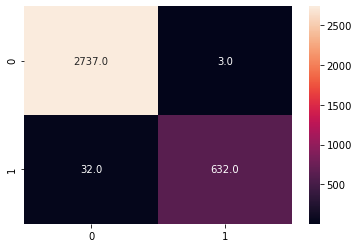

In [93]:
sns.heatmap(confusion_matrix(y_train,y_train_prediction_bagging),annot=True,fmt='.1f')
plt.show()

In [94]:
#Calculating different metrics
bagging_train_perf = model_performance_classification_sklearn(bagging,X_train,y_train)
bagging_test_perf = model_performance_classification_sklearn(bagging,X_test,y_test)
bagging_perf = bagging_train_perf.append(bagging_test_perf,ignore_index=True)
bagging_perf.index = ['Training','Test']
bagging_perf.head()

,Accuracy,Recall,Precision,F1
Training,0.989718,0.951807,0.995276,0.973056
Test,0.898561,0.561265,0.793296,0.657407


The Accuracy between the two sets is decent but there are massive disparities between Reacall and F1 in train and test set. Precision could also be closer betweent the two data sets.

#### Random Forest

In [95]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

# Predicting the train set
y_train_prediction_rf = rf.predict(X_train)

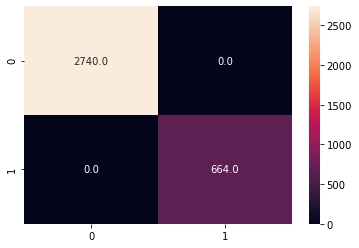

In [96]:
sns.heatmap(confusion_matrix(y_train,y_train_prediction_rf),annot=True,fmt='.1f')
plt.show()

In [97]:
rf_train_perf = model_performance_classification_sklearn(rf,X_train,y_train)
rf_test_perf = model_performance_classification_sklearn(rf,X_test,y_test)
rf_perf = rf_train_perf.append(rf_test_perf,ignore_index=True)
rf_perf.index = ['Training','Test']
rf_perf.head()

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.000000
Test,0.892392,0.501976,0.803797,0.618005


The difference in accuracy between the two sets is slightly larger here. Recall and F1 both have slightly larger disparities when compared to bagging, precision is roughly the same. The Accuracy between the two sets is decent but there are massive disparities between Reacall and F1 in train and test set. Precision could also be closer betweent the two data sets. With similiarities between the two sets in the shape of the data but baggings predictions closer between train and test it maybe be the better predictor. 

#### Lets look at our most important features

In [98]:
pd.DataFrame(rf.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
MonthlyIncome,0.169021
Age,0.163543
Passport,0.082022
NumberOfTrips,0.074038
PreferredPropertyStar,0.057085
CityTier,0.043634
NumberOfChildrenVisiting,0.041520
Designation_Executive,0.041126
NumberOfPersonVisiting,0.037398
OwnCar,0.028625


#### Decision Tree

In [99]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

# Predicting the train set
y_train_prediction_dtree = dtree.predict(X_train)

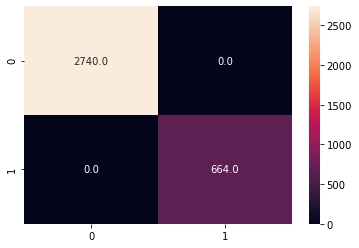

In [100]:
sns.heatmap(confusion_matrix(y_train,y_train_prediction_dtree),annot=True,fmt='.1f')
plt.show()

In [101]:
dtree_train_perf = model_performance_classification_sklearn(dtree,X_train,y_train)
dtree_test_perf = model_performance_classification_sklearn(dtree,X_test,y_test)
dtree_perf = dtree_train_perf.append(dtree_test_perf,ignore_index=True)
dtree_perf.index = ['Training','Test']
dtree_perf.head()

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.000000
Test,0.875942,0.671937,0.634328,0.652591


The difference in accuracy between the three sets is even larger here with decision tree having the largest disparity. Recall and F1 both have better disparities when compared to bagging, precision is has the largest disparity of any of the datasets. As the company wants to minimize false postiives so recall is our best metric here. This makes decision tree the best model of the three so far but that doesnt mean its a good one yet. 

#### Lets look at the important features

In [102]:
pd.DataFrame(dtree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
MonthlyIncome,0.207553
Age,0.179241
NumberOfTrips,0.075587
Designation_Executive,0.075487
Passport,0.069734
CityTier,0.053556
PreferredPropertyStar,0.043937
NumberOfPersonVisiting,0.035984
NumberOfChildrenVisiting,0.031624
MaritalStatus_Married,0.025907


## Model Improvement - Bagging

The company wants to optimize for recall so we can minimize the set of potential customers we predict as false negatives. We are ok with pitching to customers who might be false negatives but want to minimize the number of customers that would buy and are missed.

#### Tuning Bagging

In [103]:
#Run GridSearch
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.8,0.9,1],'max_features':[0.8,0.9,1]}

score = metrics.make_scorer(metrics.recall_score)

grid_search = GridSearchCV(bagging_tuned, parameters, scoring=score, cv=5)
grid_search = grid_search.fit(X_train, y_train)

bagging_tuned = grid_search.best_estimator_

bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, random_state=1)

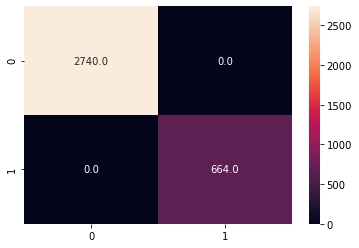

In [104]:
y_train_prediction_bagging_tuned = bagging_tuned.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_rf),annot=True,fmt='.1f')
plt.show()

In [105]:
#Calculating different metrics
bagging_train_perf_tuned = model_performance_classification_sklearn(bagging_tuned,X_train,y_train)
bagging_test_perf_tuned = model_performance_classification_sklearn(bagging_tuned,X_test,y_test)
bagging_perf_tuned = bagging_train_perf_tuned.append(bagging_test_perf_tuned,ignore_index=True)
bagging_perf_tuned.index = ['Training','Test']
bagging_perf_tuned.head()

,Accuracy,Recall,Precision,F1
Training,0.987662,0.941265,0.995223,0.967492
Test,0.886223,0.482213,0.777070,0.595122


Overall performance metrics are not considerably better and our recall has gotten worse

#### Tuning Random Forest

In [106]:
# Run GridSearch
rf_tuned = RandomForestClassifier(random_state=1)
parameters = {"n_estimators": [50,100,150], "min_samples_leaf": np.arange(5, 10), "max_features": np.arange(0.2,0.7,0.1)}

score = metrics.make_scorer(metrics.recall_score)

grid_search = GridSearchCV(rf_tuned, parameters, scoring=score,cv=5)
grid_search = grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_search.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5000000000000001, min_samples_leaf=5,
                       n_estimators=50, random_state=1)

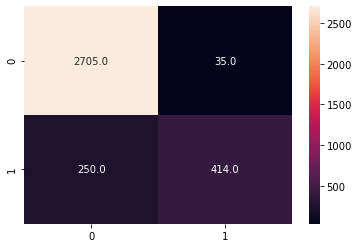

In [107]:
y_train_prediction_rf_tuned = rf_tuned.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_rf_tuned),annot=True,fmt='.1f')
plt.show()

In [108]:
#Calculating different metrics
rf_train_perf_tuned = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_test_perf_tuned = model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_perf_tuned = rf_train_perf_tuned.append(rf_test_perf_tuned,ignore_index=True)
rf_perf_tuned.index = ['Training','Test']
rf_perf_tuned.head()

,Accuracy,Recall,Precision,F1
Training,0.916275,0.623494,0.922049,0.743935
Test,0.873886,0.454545,0.714286,0.555556


We can see weve brought the recal between the test and training sets signficantly closer together but neither sets has a good result. 

#### Lets look at our most important features

In [109]:
pd.DataFrame(rf.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
MonthlyIncome,0.169021
Age,0.163543
Passport,0.082022
NumberOfTrips,0.074038
PreferredPropertyStar,0.057085
CityTier,0.043634
NumberOfChildrenVisiting,0.041520
Designation_Executive,0.041126
NumberOfPersonVisiting,0.037398
OwnCar,0.028625


#### Tuning Decision Tree

In [110]:
#Run GridSearch
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {'max_depth': np.arange(2,10),'min_samples_leaf': [5, 7, 10, 15],'max_leaf_nodes': [2, 3, 5, 10,15],'min_impurity_decrease': [0.0001,0.001,0.01,0.1]}

grid_search = GridSearchCV(dtree_tuned, parameters, scoring=score, cv=5)
grid_search = grid_search.fit(X_train, y_train)

dtree_tuned = grid_search.best_estimator_

dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=4,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

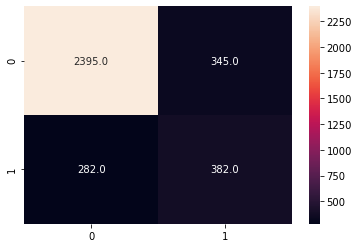

In [111]:
y_train_prediction_dtree_tuned = dtree_tuned.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_dtree_tuned),annot=True,fmt='.1f')
plt.show()

In [112]:
#Calculating different metrics
dtree_train_perf_tuned = model_performance_classification_sklearn(dtree_tuned,X_train,y_train)
dtree_test_perf_tuned = model_performance_classification_sklearn(dtree_tuned,X_test,y_test)
dtree_perf_tuned = dtree_train_perf_tuned.append(dtree_test_perf_tuned,ignore_index=True)
dtree_perf_tuned.index = ['Training','Test']
dtree_perf_tuned.head()

,Accuracy,Recall,Precision,F1
Training,0.815805,0.575301,0.525447,0.549245
Test,0.807402,0.521739,0.452055,0.484404


Our measures are all very close between the training and test sets. 

#### Lets Look at our important Features

In [113]:
pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
Passport,0.369456
Designation_Executive,0.284888
Age,0.109952
CityTier,0.108570
PreferredPropertyStar,0.052386
MaritalStatus_Married,0.049474
MaritalStatus_Divorced,0.025275
Gender_Female,0.000000
Designation_Senior Manager,0.000000
Designation_Manager,0.000000


#### Feature Notes

Designation_Executive, Age, Passport and Monthly income appear to be some of our most important features accross various methods

## Model Building - Boosting

### From the published Rburics Tracker

- 1) Train the adaboost classifier with default parameters and comment on model peformance (1)
- 2) Train the gradient boosting classifier with default parameters and comment on model peformance (1)
- 3) Train the xgboost classifier with default parameters and comment on model peformance (1)
- 4) Train the stacking classifier and comment on model peformance (1)

#### Adaboost Classifier

In [114]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

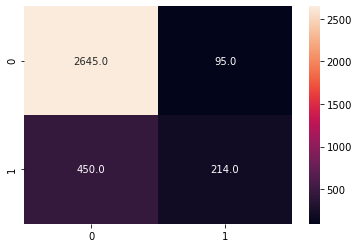

In [115]:
y_train_prediction_abc = abc.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_abc),annot=True,fmt='.1f')
plt.show()

In [116]:
#Calculating different metrics
abc_train_perf = model_performance_classification_sklearn(abc,X_train,y_train)
abc_test_perf = model_performance_classification_sklearn(abc,X_test,y_test)
abc_perf = abc_train_perf.append(abc_test_perf,ignore_index=True)
abc_perf.index = ['Training','Test']
abc_perf.head()

,Accuracy,Recall,Precision,F1
Training,0.839894,0.322289,0.692557,0.439877
Test,0.843043,0.264822,0.609091,0.369146


#### Adaboost Analysis:

The recall on Adaboost is attroucious, Accuracy is ok, Precision is better than recall and F1 but not good.


#### Lets look at feature importance

In [117]:
pd.DataFrame(abc.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
MonthlyIncome,0.42
Age,0.14
Passport,0.04
Designation_Executive,0.04
CityTier,0.04
Designation_VP,0.04
NumberOfTrips,0.04
PreferredPropertyStar,0.04
Gender_Male,0.02
MaritalStatus_Single,0.02


#### Gradient Boost Classifier

In [118]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

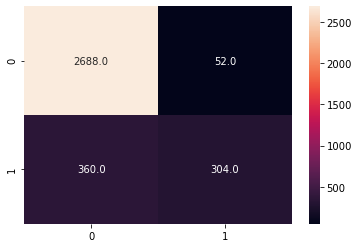

In [119]:
y_train_prediction_gbc = gbc.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_gbc),annot=True,fmt='.1f')
plt.show()

In [120]:
#Calculating different metrics
gbc_train_perf = model_performance_classification_sklearn(gbc,X_train,y_train)
gbc_test_perf = model_performance_classification_sklearn(gbc,X_test,y_test)
gbc_perf = gbc_train_perf.append(gbc_test_perf,ignore_index=True)
gbc_perf.index = ['Training','Test']
gbc_perf.head()

,Accuracy,Recall,Precision,F1
Training,0.878966,0.457831,0.853933,0.596078
Test,0.861549,0.367589,0.688889,0.479381


#### Gradient Boost Analysis:

Very similar to Adaboost, Accuracy is strong but precision between train and test has a large disparity and recall is awful. 


#### Lets look at feature importance

In [121]:
pd.DataFrame(gbc.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
Passport,0.189656
Designation_Executive,0.162358
MonthlyIncome,0.143556
Age,0.131894
CityTier,0.067447
NumberOfTrips,0.049291
MaritalStatus_Single,0.049136
PreferredPropertyStar,0.044470
MaritalStatus_Unmarried,0.033659
Occupation_Large Business,0.025810


#### XGBoost Classifiers

In [122]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

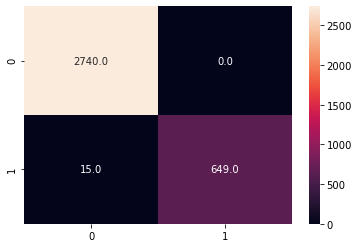

In [123]:
y_train_prediction_xgb = xgb.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_xgb),annot=True,fmt='.1f')
plt.show()

In [124]:
#Calculating different metrics
xgb_train_perf = model_performance_classification_sklearn(xgb,X_train,y_train)
xgb_test_perf = model_performance_classification_sklearn(xgb,X_test,y_test)
xgb_perf = xgb_train_perf.append(xgb_test_perf,ignore_index=True)
xgb_perf.index = ['Training','Test']
xgb_perf.head()

,Accuracy,Recall,Precision,F1
Training,0.995593,0.977410,1.00000,0.988576
Test,0.891707,0.573123,0.74359,0.647321


#### XG Boost Analysis:

- Recall on the training set is extremely good and the best of the boosting methods so far for both train and test. However the 40% disparity in effectiveness between train and test lets us know something is off here. Accruacy and Precision are both some of the strongest nubmers weve seen. 


#### Lets look at feature importance

In [125]:
pd.DataFrame(xgb.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
Designation_Executive,0.183968
Passport,0.110296
MaritalStatus_Divorced,0.068061
Occupation_Large Business,0.052991
CityTier,0.044948
MaritalStatus_Unmarried,0.043734
Designation_AVP,0.039617
MaritalStatus_Married,0.038828
MaritalStatus_Single,0.038472
PreferredPropertyStar,0.034062


#### Stacking Classifier

In [126]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc), ('Decision Tree',dtree_tuned)]

final_estimator = xgb

stacking = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.5000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.35,
                                                                     1: 0.65},
                                                       max_depth=4,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.0001,
                                                       min_s...
                

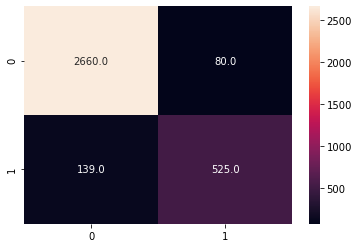

In [127]:
y_train_prediction_stacking = stacking.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_stacking),annot=True,fmt='.1f')
plt.show()

In [128]:
#Calculating different metrics
stacking_train_perf_tuned = model_performance_classification_sklearn(stacking,X_train,y_train)
stacking_test_perf_tuned = model_performance_classification_sklearn(stacking,X_test,y_test)
stacking_perf_tuned = stacking_train_perf_tuned.append(stacking_test_perf_tuned,ignore_index=True)
stacking_perf_tuned.index = ['Training','Test']
stacking_perf_tuned.head()

,Accuracy,Recall,Precision,F1
Training,0.935664,0.790663,0.867769,0.827423
Test,0.868403,0.549407,0.640553,0.591489


#### Stacking Analysis:

Stacking has a perforamance closer to XGBoost but is more computational heavy than XGBoost. 


## Model Improvement - Boosting

#### Adaboost Tuned

In [129]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

score = metrics.make_scorer(metrics.recall_score)

grid_search = GridSearchCV(abc_tuned, parameters, scoring=score,cv=5)
grid_search = grid_search.fit(X_train, y_train)

abc_tuned = grid_search.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.8, n_estimators=100, random_state=1)

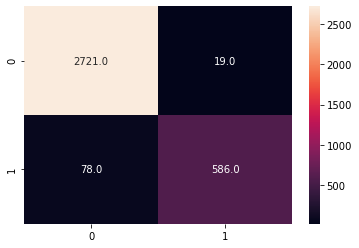

In [130]:
y_train_prediction_abc_tuned = abc_tuned.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_abc_tuned),annot=True,fmt='.1f')
plt.show()

In [131]:
abc_train_perf_tuned = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_test_perf_tuned = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_perf_tuned = abc_train_perf_tuned.append(abc_test_perf_tuned,ignore_index=True)
abc_perf_tuned.index = ['Training','Test']
abc_perf_tuned.head()

,Accuracy,Recall,Precision,F1
Training,0.971504,0.882530,0.968595,0.923562
Test,0.864976,0.549407,0.626126,0.585263


#### Adaboot Tuned Analysis:

Numbers are much better but still not better than XGBoost


#### Lets look at feature importance

In [132]:
pd.DataFrame(abc_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
MonthlyIncome,0.433587
Age,0.175369
NumberOfTrips,0.054169
Passport,0.042437
PreferredPropertyStar,0.039019
CityTier,0.026140
NumberOfPersonVisiting,0.022775
Designation_Manager,0.019403
Designation_Executive,0.019008
Occupation_Salaried,0.018177


#### Gradient Boost Tuned

In [133]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [5,10,15],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

score = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_search = GridSearchCV(gbc_tuned, parameters, scoring=score,cv=5)
grid_search = grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_search.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=5, random_state=1,
                           subsample=0.9)

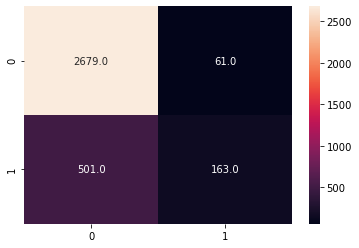

In [134]:
y_train_prediction_gbc_tuned = gbc_tuned.predict(X_train)

sns.heatmap(confusion_matrix(y_train,y_train_prediction_gbc_tuned),annot=True,fmt='.1f')
plt.show()

In [135]:
#Calculating different metrics
gbc_train_perf_tuned = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_test_perf_tuned = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_perf_tuned = gbc_train_perf_tuned.append(gbc_test_perf_tuned,ignore_index=True)
gbc_perf_tuned.index = ['Training','Test']
gbc_perf_tuned.head()

,Accuracy,Recall,Precision,F1
Training,0.834900,0.245482,0.727679,0.367117
Test,0.849897,0.241107,0.693182,0.357771


#### Gradient Boost Analysis:

Our recall is the worst here of all test sets


#### Lets look at feature importance

In [140]:
pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)

,Importance
Passport,0.361545
Designation_Executive,0.273363
Age,0.141099
CityTier,0.075184
MaritalStatus_Single,0.069198
Occupation_Large Business,0.029139
PreferredPropertyStar,0.022182
MaritalStatus_Unmarried,0.016071
MonthlyIncome,0.012218
Gender_Male,0.000000


## Insights and Recommendations

### Bagging
- **Bagging:** The Accuracy between the two sets is decent but there are massive disparities between Reacall and F1 in train and test set. Precision could also be closer betweent the two data sets.
- **Random Forest:** The difference in accuracy between the two sets is slightly larger here. Recall and F1 both have slightly larger disparities when compared to bagging, precision is roughly the same. The Accuracy between the two sets is decent but there are massive disparities between Reacall and F1 in train and test set. Precision could also be closer betweent the two data sets. With similiarities between the two sets in the shape of the data but baggings predictions closer between train and test it maybe be the better predictor.
- **Decision Tree:** The difference in accuracy between the three sets is even larger here with decision tree having the largest disparity. Recall and F1 both have better disparities when compared to bagging, precision is has the largest disparity of any of the datasets. As the company wants to minimize false postiives so recall is our best metric here. This makes decision tree the best model of the three so far but that doesnt mean its a good one yet. 
- **Tuned Bagging:** Overall performance metrics are not considerably better and our recall has gotten worse
- **Tuned Random Forest:** We can see weve brought the recal between the test and training sets signficantly closer together but neither sets has a good result.
- **Tuned Decision Tree:** Our measures are all very close between the training and test sets. However, recall is def not good. 


#### Bagging Important Features:
- MonthlyIncome
- Age
- Passport
- CityTier

### Boosting
- **Adaboost:** The recall on Adaboost is attroucious, Accuracy is ok, Precision is better than recall and F1 but not good.
- **Gradient Boost:** Very similar to Adaboost, Accuracy is strong but precision between train and test has a large disparity and recall is awful.
- **XGBoost:** Recall on the training set is extremely good and the best of the boosting methods so far for both train and test. However the 40% disparity in effectiveness between train and test lets us know something is off here. Accruacy and Precision are both some of the strongest nubmers weve seen. 
- **Stacking:** Stacking has a perforamance closer to XGBoost but is more computational heavy than XGBoost. 
- **Adaboost Tuned:** Numbers are much better but still not better than XGBoost
- **Gradient Boost Tuned:** Our recall is the worst here of all test sets

#### Boosting Important Features: 
- Monthly Income 
- Age
- Passport
- Designation_Executive

### Business Recommendations
- XGBoost focusing on the features of monthly income, age, passport & executives will provide our best targeting information for new customers. 
- Package might be best geared to specific type of customers
- In the past self iniated contact has been the largest group of customers to purchase a product, this will be a good comparison metric to test the effectiveness of our algorthim
- Free Lancers are best left out of targeting all together
- Pitches should never be longer than 15 minutes